# **Data**

In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical operations and handling arrays
import numpy as np

# Import LogisticRegression from sklearn for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Import matplotlib.pyplot for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization based on matplotlib
import seaborn as sns

# Import StandardScaler from sklearn to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler


In [ ]:
# Specify the file paths for the Excel files to be used in the analysis.
# The paths point to the location of the files on Google Drive.
path_TELE = rf'/content/drive/MyDrive/Sapienza/Resources/WP2 -TELEMAIA Associazione tra EEG e TELEMONITORING features in Nold e MCI.xlsx'
path_EEG = rf'/content/drive/MyDrive/Sapienza/Resources/WP2 -TELEMAIA EEG features in Nold e PD con deficit cognitivi.xlsx'
path_MRI = rf'/content/drive/MyDrive/Sapienza/Resources/WP2 -TELEMAIA MRI features in Nold e PD con deficit cognitivi.xlsx'

In [ ]:
# Create variables to store data from Excel files as DataFrames
# Read specific sheets from each Excel file into separate DataFrames

# Load the data from the 'best' sheet in the TELEMAIA Excel file into the DataFrame 'data_tele'
data_tele = pd.read_excel(path_TELE, sheet_name='best')

# Load the data from the 'all' sheet in the EEG features Excel file into the DataFrame 'data_eeg'
data_eeg = pd.read_excel(path_EEG, sheet_name='all')

# Load the data from the 'all' sheet in the MRI features Excel file into the DataFrame 'data_mri'
data_mri = pd.read_excel(path_MRI, sheet_name='all')

# **Exploratory Data Analysis**

**df = data_eeg**: This line assigns the DataFrame data_eeg (which contains EEG features data from the Excel file) to a new variable named df. This is a common practice when you want to work with a specific dataset but prefer to use a more general or shorter variable name like df for convenience.

In [ ]:
# Assign the DataFrame 'data_eeg' to the variable 'df'
df = data_eeg

In [ ]:
# Map column names to regions of interest
# regions: This is a list that contains the names of different brain regions of interest, specifically the Frontal, Central, Parietal, Occipital, and Temporal lobes. These regions are typically used in EEG studies to categorize and analyze brain activity.
regions = ['Frontal', 'Central', 'Parietal', 'Occipital', 'Temporal']
# bands: This dictionary maps the names of different EEG frequency bands to their corresponding abbreviations. Each frequency band (Delta, Theta, Alpha, Beta, Gamma) is associated with a short code (e.g., 'De' for Delta, 'Th' for Theta). This mapping is useful for simplifying column names or labels when working with EEG data.
bands = {
    'Delta': 'De',
    'Theta': 'Th',
    'Alpha 1': 'A1',
    'Alpha 2': 'A2',
    'Alpha 3': 'A3',
    'Beta 1': 'B1',
    'Beta 2': 'B2',
    'Gamma': 'Ga',
}

In [ ]:
# Initial visualization
print(df.head())

                   Subj Group  Unit  Age  Sex  Education  MMSEg  MMSEcorr  \
0  Istanbul_HC_faledev1    HC     1   61    0          5     29      29.0   
1  Istanbul_HC_falisog1    HC     1   56    0         12     29      29.0   
2  Istanbul_HC_falmasi1    HC     1   61    0          5     30      30.0   
3  Istanbul_HC_falmyel1    HC     1   58    0         15     29      29.0   
4  Istanbul_HC_falmyil1    HC     1   56    1         16     28      28.0   

    TF   IAF  ...      Ga-F      Ga-C      Ga-P      Ga-O      Ga-T      Ga-L  \
0  4.5  10.0  ...  0.506201  0.272497  0.078661  0.053723  0.435926  0.132839   
1  6.0  10.0  ...  0.135269  0.062833  0.086813  0.095959  0.360152  0.043232   
2  5.5   8.5  ...  0.076700  0.078579  0.078238  0.087077  0.208819  0.041912   
3  4.0   7.0  ...  0.068814  0.030874  0.027713  0.022462  0.108711  0.018712   
4  6.0   9.5  ...  0.108541  0.028565  0.022697  0.034459  0.125239  0.025743   

   De-global  Th-global  A1-global  A3-global  
0 

In [ ]:
# Using print(df) will display the entire contents of the DataFrame df in the console. This includes all rows and columns, which can be quite extensive depending on the size of the DataFrame.
df

,Subj,Group,Unit,Age,Sex,Education,MMSEg,MMSEcorr,TF,IAF,...,Ga-F,Ga-C,Ga-P,Ga-O,Ga-T,Ga-L,De-global,Th-global,A1-global,A3-global
0,Istanbul_HC_faledev1,HC,1,61,0,5,29,29.0,4.5,10.0,...,0.506201,0.272497,0.078661,0.053723,0.435926,0.132839,0.271208,0.174212,0.149279,0.332717
1,Istanbul_HC_falisog1,HC,1,56,0,12,29,29.0,6.0,10.0,...,0.135269,0.062833,0.086813,0.095959,0.360152,0.043232,0.336950,0.230216,0.207011,0.501268
2,Istanbul_HC_falmasi1,HC,1,61,0,5,30,30.0,5.5,8.5,...,0.076700,0.078579,0.078238,0.087077,0.208819,0.041912,0.425909,0.284990,0.260351,0.591459
3,Istanbul_HC_falmyel1,HC,1,58,0,15,29,29.0,4.0,7.0,...,0.068814,0.030874,0.027713,0.022462,0.108711,0.018712,0.450753,0.396862,0.333317,0.824551
4,Istanbul_HC_falmyil1,HC,1,56,1,16,28,28.0,6.0,9.5,...,0.108541,0.028565,0.022697,0.034459,0.125239,0.025743,0.397387,0.224540,0.156795,0.582360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,NewCastle_PDD_veeg15,PDD,3,74,1,10,27,25.4,4.0,6.5,...,0.094793,0.090369,0.085856,0.095031,0.140250,0.036940,0.684472,0.543441,0.453188,0.460693
100,NewCastle_PDD_veeg39,PDD,3,72,1,10,14,12.4,4.0,6.0,...,0.182388,0.092736,0.137602,0.154296,0.309912,0.053913,0.702860,0.509805,0.384683,0.243941
101,NewCastle_PDD_veeg48,PDD,3,72,0,12,27,25.4,4.0,6.5,...,0.192070,0.356438,0.374956,0.311274,0.194528,0.124591,0.439533,0.376506,0.336804,0.375846
102,NewCastle_PDD_veeg49,PDD,3,76,1,10,22,21.0,4.0,6.5,...,0.046984,0.160380,0.189291,0.206459,0.056885,0.051466,0.543187,0.408995,0.330430,0.645904


# **Descriptive Statistics**

## **Full Statistical Summary**

In [ ]:
# Generate summary statistics for all columns, including numerical and categorical data
summary_statistics = df.describe(include='all')

# Print the summary statistics
print(summary_statistics)

                        Subj Group       Unit         Age         Sex  \
count                    104   104  104.00000  104.000000  104.000000   
unique                   104     2        NaN         NaN         NaN   
top     Istanbul_HC_faledev1    HC        NaN         NaN         NaN   
freq                       1    54        NaN         NaN         NaN   
mean                     NaN   NaN    2.00000   69.807692    0.615385   
std                      NaN   NaN    0.85899    7.068427    0.488860   
min                      NaN   NaN    1.00000   52.000000    0.000000   
25%                      NaN   NaN    1.00000   65.750000    0.000000   
50%                      NaN   NaN    2.00000   71.000000    1.000000   
75%                      NaN   NaN    3.00000   75.000000    1.000000   
max                      NaN   NaN    3.00000   84.000000    1.000000   

         Education       MMSEg    MMSEcorr          TF         IAF  ...  \
count   104.000000  104.000000  104.000000  104.

In [ ]:
# Group the DataFrame by the 'Group' column and calculate summary statistics for the 'Age' column
grouped_age_summary = df.groupby('Group')['Age'].describe(include='all')

# Print the summary statistics for the 'Age' column, grouped by 'Group'
print(grouped_age_summary)

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
HC,54.0,69.148148,8.097070,52.0,63.0,70.0,74.75,84.0
PDD,50.0,70.520000,5.754289,56.0,67.0,72.0,74.75,82.0


In [ ]:
# The scipy.stats module in Python provides a wide range of statistical functions and tools. It is part of the SciPy library, which is a powerful library for scientific and technical computing in Python.
from scipy import stats

# Function to compute descriptive statistics
def descriptive_stats(df, group_col, numeric_cols):
    stats_dict = {}  # Initialize a dictionary to store statistics

    # Iterate over each numeric column
    for col in numeric_cols:
        # Group by the specified column and compute descriptive statistics for the numeric column
        grouped = df.groupby(group_col)[col].describe()

        # Extract count of non-null entries for each group
        N = grouped['count']
        stats_dict['N'] = grouped['count']

        # Extract mean values and convert to dictionary
        stats_dict[col] = grouped['mean'].to_dict()

        # Compute standard deviation and standard error
        std = grouped['std']
        std_error = std / np.sqrt(N)

        # Store standard error in the dictionary
        stats_dict[f'SE_{col}'] = std_error

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_dict)
    return stats_df

# Define numeric columns to analyze
numeric_cols = ['Age', 'Education', 'MMSEg']

# Compute the descriptive statistics and store in a DataFrame
stats_df = descriptive_stats(df, 'Group', numeric_cols)

In [ ]:
def add_standard_error(df, numeric_cols):
    # Create an empty DataFrame to store the standard error results
    error_df = pd.DataFrame()

    # Ensure 'N' is in the DataFrame and add it to error_df
    if 'N' in df.columns:
        error_df['N'] = df['N']

    # Iterate over the numeric columns
    for col in numeric_cols:
        if col in df.columns:
            # Extract the mean values for the current column
            mean_values = df[col]
            se_col = f'SE_{col}'  # Name of the column for standard errors

            # Check if the standard error column exists
            if se_col in df.columns:
                se_values = df[se_col]

                # Format mean ± standard error for each index
                formatted_values = {
                    idx: f"{mean_values[idx]:.2f} ± {se_values[idx]:.2f}"
                    for idx in mean_values.index
                }

                # Add the formatted values to the error DataFrame
                error_df[col] = pd.Series(formatted_values)

    return error_df

# Generate the error DataFrame using the statistics DataFrame and numeric columns
error_df = add_standard_error(stats_df, numeric_cols)
# Set the index name of the error DataFrame to 'Group'
error_df.index.name = 'Group'

In [ ]:
def create_contingency_table(df, group_col, sex_col, groups):
    # Get the counts of each value in 'Sex' for each group
    sex_group1 = df[df[group_col] == groups[0]][sex_col].value_counts()
    sex_group2 = df[df[group_col] == groups[1]][sex_col].value_counts()

    # Ensure all possible values of 'Sex' are represented in the table
    all_values = sorted(set(sex_group1.index).union(set(sex_group2.index)))

    # Create a contingency table with all possible values
    contingency_table = pd.DataFrame(index=all_values, columns=groups, data=0)

    # Fill the contingency table with the counts for each group
    for value in all_values:
        contingency_table.loc[value, groups[0]] = sex_group1.get(value, 0)
        contingency_table.loc[value, groups[1]] = sex_group2.get(value, 0)

    return contingency_table

In [ ]:
def create_sex_summary(df, group_col, sex_col, groups):
    # Create the contingency table using the provided function
    contingency_table = create_contingency_table(df, group_col, sex_col, groups)

    # Get counts of each 'Sex' value for each group
    sex_group1 = df[df[group_col] == groups[0]][sex_col].value_counts()
    sex_group2 = df[df[group_col] == groups[1]][sex_col].value_counts()

    # Count total entries for each group
    total_group1 = sex_group1.sum()
    total_group2 = sex_group2.sum()

    # Count the number of males and females in each group
    males_group1 = sex_group1.get(1, 0)
    females_group1 = sex_group1.get(0, 0)
    males_group2 = sex_group2.get(1, 0)
    females_group2 = sex_group2.get(0, 0)

    # Calculate the percentage of males and females in each group
    percent_males_group1 = (males_group1 / total_group1) * 100
    percent_females_group1 = (females_group1 / total_group1) * 100
    percent_males_group2 = (males_group2 / total_group2) * 100
    percent_females_group2 = (females_group2 / total_group2) * 100

    # Create a DataFrame summarizing the sex distribution in each group
    summary_df = pd.DataFrame({
        'Group': groups,
        'Sex (M/F)': [
            f"{males_group1}/{females_group1} ({percent_males_group1:.0f}%)",
            f"{males_group2}/{females_group2} ({percent_males_group2:.0f}%)"
        ]
    })

    return summary_df

# Define the groups to compare
groups = ['HC', 'PDD']

# Generate the sex summary DataFrame
sex_summary_df = create_sex_summary(df, 'Group', 'Sex', groups)

# Ensure the index of sex_summary_df matches the index of error_df
sex_summary_df.set_index('Group', inplace=True)

# Insert the 'Sex (M/F)' column into the error_df DataFrame
error_df.insert(2, 'Sex (M/F)', sex_summary_df['Sex (M/F)'])

In [ ]:
def statistical_tests(df, group_col, numeric_cols):
    # Create an empty DataFrame to store test results
    tests_df = pd.DataFrame()
    # Get unique groups from the group column
    groups = df[group_col].unique()

    # Loop over each numeric column
    for col in numeric_cols:
        # Extract data for each group
        group1 = df[df[group_col] == groups[0]][col]
        group2 = df[df[group_col] == groups[1]][col]

        # Perform T-test (for normally distributed data)
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
        t_test_result = f"p={p_val:.3f}"

        # Perform Mann-Whitney U test (for non-normally distributed data)
        u_stat, p_val = stats.mannwhitneyu(group1, group2)
        mann_whitney_result = f"p={p_val:.3f}"

        # Perform Fisher's Exact Test (for categorical variables)
        if col == 'Sex':
            # Create a contingency table for Fisher's test
            contingency_table = pd.crosstab(df[df[group_col] == groups[0]][col],
                                           df[df[group_col] == groups[1]][col])
            if contingency_table.shape == (2, 2):  # Fisher's test only for 2x2 table
                odds_ratio, p_val = stats.fisher_exact(contingency_table)
                fisher_test_result = f"p={p_val:.3f}"
            else:
                fisher_test_result = "NaN"
        else:
            fisher_test_result = "NaN"

        # Store test results in the DataFrame
        tests_df.loc[col, 'T-test'] = t_test_result
        tests_df.loc[col, 'U test'] = mann_whitney_result
        tests_df.loc[col, "Fisher's"] = fisher_test_result

    return tests_df

# Apply the statistical tests function to get the results
numeric_cols = ['Age', 'Sex', 'Education', 'MMSEg']
tests_df = statistical_tests(df, 'Group', numeric_cols)

# Combine descriptive statistics and statistical tests results
final_df = pd.concat([error_df.T, tests_df], axis=1)

# Display the final table
print(final_df)

                     HC           PDD   T-test   U test Fisher's
N                  54.0          50.0      NaN      NaN      NaN
Age        69.15 ± 1.10  70.52 ± 0.81  p=0.319  p=0.332      NaN
Sex (M/F)   25/29 (46%)   39/11 (78%)      NaN      NaN      NaN
Education  10.52 ± 0.61   9.46 ± 0.54  p=0.198  p=0.189      NaN
MMSEg      28.52 ± 0.20  20.28 ± 0.60  p=0.000  p=0.000      NaN
Sex                 NaN           NaN  p=0.001  p=0.001      NaN


In [ ]:
def descriptive_stats(df, group_col, numeric_cols):
    # Create an empty dictionary to store statistics
    stats_dict = {}

    # Loop over each numeric column to compute statistics
    for col in numeric_cols:
        # Group the DataFrame by the specified column and describe the numeric column
        grouped = df.groupby(group_col)[col].describe()

        # Extract the number of observations (N) for each group
        N = grouped['count']

        # Store the count of observations in the dictionary
        stats_dict['N'] = grouped['count']

        # Store the mean values for each group and column
        stats_dict[col] = grouped['mean'].to_dict()

        # Extract standard deviation for each group
        std = grouped['std']

        # Compute standard error by dividing standard deviation by the square root of the sample size
        std_error = std / np.sqrt(N)

        # Store the standard error in the dictionary with a prefix 'SE_'
        stats_dict[f'SE_{col}'] = std_error

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame(stats_dict)

    return stats_df

In [ ]:
def add_standard_error(df, numeric_cols):
    error_df = pd.DataFrame()

    # Ensure 'N' is in the DataFrame and add it to error_df
    if 'N' in df.columns:
        error_df['N'] = df['N']

    # Iterate over the numeric columns
    for col in numeric_cols:
        if col in df.columns:
            # Get mean values for each group
            mean_values = df[col]
            se_col = f'SE_{col}'  # Name of the standard error column

            if se_col in df.columns:
                se_values = df[se_col]

                # Format: mean ± standard error
                formatted_values = {
                    idx: f"{mean_values[idx]:.2f} ± {se_values[idx]:.2f}"
                    for idx in mean_values.index
                }

                # Add formatted values to the error DataFrame
                error_df[col] = pd.Series(formatted_values)

    return error_df

In [ ]:
def create_contingency_table(df, group_col, sex_col, groups):
    # Get counts of each value of 'Sex' for each group
    sex_group1 = df[df[group_col] == groups[0]][sex_col].value_counts()
    sex_group2 = df[df[group_col] == groups[1]][sex_col].value_counts()

    # Combine all possible values of 'Sex' from both groups
    all_values = sorted(set(sex_group1.index).union(set(sex_group2.index)))

    # Create an empty DataFrame with all values and groups
    contingency_table = pd.DataFrame(index=all_values, columns=groups, data=0)

    # Fill the table with counts from each group
    for value in all_values:
        contingency_table.loc[value, groups[0]] = sex_group1.get(value, 0)
        contingency_table.loc[value, groups[1]] = sex_group2.get(value, 0)

    return contingency_table

In [ ]:
def create_sex_summary(df, group_col, sex_col, groups):
    # Create a contingency table to summarize the counts of 'Sex' for each group
    contingency_table = create_contingency_table(df, group_col, sex_col, groups)

    # Count occurrences of each value in 'Sex' for each group
    sex_group1 = df[df[group_col] == groups[0]][sex_col].value_counts()
    sex_group2 = df[df[group_col] == groups[1]][sex_col].value_counts()

    # Calculate total counts for each group
    total_group1 = sex_group1.sum()
    total_group2 = sex_group2.sum()

    # Extract counts for males and females in each group
    males_group1 = sex_group1.get(1, 0)
    females_group1 = sex_group1.get(0, 0)
    males_group2 = sex_group2.get(1, 0)
    females_group2 = sex_group2.get(0, 0)

    # Calculate percentages of males and females in each group
    percent_males_group1 = (males_group1 / total_group1) * 100
    percent_females_group1 = (females_group1 / total_group1) * 100
    percent_males_group2 = (males_group2 / total_group2) * 100
    percent_females_group2 = (females_group2 / total_group2) * 100

    # Create a DataFrame with the summary statistics
    summary_df = pd.DataFrame({
        'Group': groups,
        'Sex (M/F)': [
            f"{males_group1}/{females_group1} ({percent_males_group1:.0f}%)",
            f"{males_group2}/{females_group2} ({percent_males_group2:.0f}%)"
        ]
    })

    return summary_df

In [ ]:
def statistical_tests(df, group_col, numeric_cols):
    tests_df = pd.DataFrame()
    groups = df[group_col].unique()

    for col in numeric_cols:
        if col == 'Sex':
            # Perform Fisher's Exact Test for the categorical 'Sex' column
            contingency_table = create_contingency_table(df, group_col, col, groups)
            if contingency_table.shape[0] == 2 and contingency_table.shape[1] == 2:
                odds_ratio, p_val = stats.fisher_exact(contingency_table)
                fisher_test_result = f"p={p_val:.3f}"
            else:
                fisher_test_result = "nan"
            tests_df.loc[col, "Fisher's"] = fisher_test_result
        else:
            # Perform T-test and Mann-Whitney U test for numeric columns
            group1 = df[df[group_col] == groups[0]][col]
            group2 = df[df[group_col] == groups[1]][col]

            # T-test (for normally distributed data)
            t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
            t_test_result = f"p={p_val:.3f}"

            # Mann-Whitney U test (for non-normally distributed data)
            u_stat, p_val = stats.mannwhitneyu(group1, group2)
            mann_whitney_result = f"p={p_val:.3f}"

            # Store results in the DataFrame
            tests_df.loc[col, 'T-test'] = t_test_result
            tests_df.loc[col, 'U test'] = mann_whitney_result
            tests_df.loc[col, "Fisher's"] = "nan"  # Not applicable for numeric columns

    return tests_df

In [ ]:
# Apply functions to obtain descriptive statistics and statistical tests
numeric_cols = ['Age', 'Education', 'MMSEg']
stats_df = descriptive_stats(df, 'Group', numeric_cols)  # Get descriptive statistics
error_df = add_standard_error(stats_df, numeric_cols)  # Add standard errors
error_df.index.name = 'Group'

# Create sex summary
groups = ['HC', 'PDD']
sex_summary_df = create_sex_summary(df, 'Group', 'Sex', groups)
sex_summary_df.set_index('Group', inplace=True)

# Insert 'Sex (M/F)' column into error_df if it does not exist
if 'Sex (M/F)' not in error_df.columns:
    error_df.insert(2, 'Sex (M/F)', sex_summary_df['Sex (M/F)'])

# Apply the function to obtain statistical tests, including 'Sex'
numeric_cols_with_sex = ['Age', 'Sex', 'Education', 'MMSEg']
tests_df = statistical_tests(df, 'Group', numeric_cols_with_sex)

# Merge descriptive statistics and statistical tests
final_df = pd.concat([error_df.T, tests_df], axis=1)

# Step 1: Replace the value of the last 'Sex (M/F)' column with the value from 'Sex'
sex_value = final_df.loc['Sex', "Fisher's"]
final_df.loc['Sex (M/F)', "Fisher's"] = sex_value

# Step 2: Drop the 'Sex' row
final_df = final_df.drop('Sex')

# Display the final DataFrame
print(final_df)

In [ ]:
# Round and convert the value for 'HC' in the 'N' row to an integer
final_df.loc['N', 'HC'] = int(round(final_df.loc['N', 'HC']))

# Round and convert the value for 'PDD' in the 'N' row to an integer
final_df.loc['N', 'PDD'] = int(round(final_df.loc['N', 'PDD']))

In [ ]:
# Function to apply formatting to the DataFrame
def style_table(df):
    return df.style.set_properties(**{
        'border': '1px solid black',  # Set border for all cells
        'padding': '5px'              # Set padding for all cells
    }).set_table_styles([{
        'selector': 'th',  # Select table header cells
        'props': [('border', '1px solid black'),  # Set border for header cells
                  ('background-color', '#000000')]  # Set background color for header cells
    }, {
        'selector': 'td',  # Select table data cells
        'props': [('border', '1px solid black')]  # Set border for data cells
    }]).set_caption('Summary of Statistics and Tests')  # Set caption for the table

# Apply the formatting function to the final DataFrame
styled_df = style_table(final_df)

# Display the styled DataFrame
styled_df

,HC,PDD,T-test,U test,Fisher's
N,54,50,nan,nan,nan
Age,69.15 ± 1.10,70.52 ± 0.81,p=0.319,p=0.332,nan
Sex (M/F),25/29 (46%),39/11 (78%),nan,nan,p=0.001
Education,10.52 ± 0.61,9.46 ± 0.54,p=0.198,p=0.189,nan
MMSEg,28.52 ± 0.20,20.28 ± 0.60,p=0.000,p=0.000,nan


## **Measures of Central Tendency**

* *Mean*: Provides the average power in each frequency band and region. It gives an overall idea of the central tendency of the data.

* *Median*: Offers a robust measure of central tendency that is less influenced by outliers. It represents the middle value when the data is sorted, providing a more stable indication of the typical value in the presence of skewed data.

* *Mode*: Identifies the most frequently occurring values in the dataset. It highlights the most common data points, which can be useful for understanding the predominant patterns.

In [ ]:
# Create lists to store the results
data = {
    'Band': [],       # List to store the frequency bands
    'Region': [],     # List to store the brain regions
    'Mean': [],       # List to store the mean values
    'Median': [],     # List to store the median values
    'Mode': []        # List to store the mode values
}

# Loop through bands and regions
for band_name, band_abbr in bands.items():
    for region in regions:
        column_name = f"{band_abbr}-{region[0]}"  # Create column name based on band abbreviation and region

        if column_name in df.columns:
            # Calculate statistics if the column exists
            mean_value = df[column_name].mean()      # Calculate the mean value
            median_value = df[column_name].median()  # Calculate the median value
            mode_value = df[column_name].mode().iloc[0]  # Calculate the mode value (take the first mode if there are multiple)

            # Store results
            data['Band'].append(band_name)           # Append band name to the list
            data['Region'].append(region)            # Append region to the list
            data['Mean'].append(mean_value)          # Append mean value to the list
            data['Median'].append(median_value)      # Append median value to the list
            data['Mode'].append(mode_value)          # Append mode value to the list
        else:
            # If the column does not exist
            data['Band'].append(band_name)           # Append band name to the list
            data['Region'].append(region)            # Append region to the list
            data['Mean'].append(np.nan)              # Append NaN for mean value
            data['Median'].append(np.nan)            # Append NaN for median value
            data['Mode'].append(np.nan)              # Append NaN for mode value

# Create a DataFrame with the results
stats_summary = pd.DataFrame(data)

print(stats_summary)  # Print the summary DataFrame

       Band     Region      Mean    Median      Mode
0     Delta    Frontal  0.529842  0.521683  0.203164
1     Delta    Central  0.493169  0.470203  0.148845
2     Delta   Parietal  0.508485  0.480117  0.157461
3     Delta  Occipital  0.455352  0.441947  0.124803
4     Delta   Temporal  0.550707  0.560554  0.224278
5     Theta    Frontal  0.370879  0.361160  0.146650
6     Theta    Central  0.369964  0.339737  0.086523
7     Theta   Parietal  0.387679  0.370342  0.107312
8     Theta  Occipital  0.347260  0.332714  0.095253
9     Theta   Temporal  0.398619  0.385972  0.171123
10  Alpha 1    Frontal  0.312318  0.299069  0.110322
11  Alpha 1    Central  0.330843  0.302486  0.081642
12  Alpha 1   Parietal  0.361459  0.344727  0.108387
13  Alpha 1  Occipital  0.322873  0.307949  0.084045
14  Alpha 1   Temporal  0.362599  0.358866  0.140019
15  Alpha 2    Frontal  0.403089  0.388832  0.137143
16  Alpha 2    Central  0.453916  0.423524  0.092452
17  Alpha 2   Parietal  0.569839  0.561331  0.

## **Measures of Dispersion**

* *Standard Deviation and Variance*: These metrics measure the variability within your data, helping you understand the extent of dispersion in each frequency band and brain region. Standard deviation provides a sense of the average distance from the mean, while variance represents the average squared deviation from the mean.

* *Range*: This measure indicates the difference between the maximum and minimum values in your data. It can highlight the spread of your data and any potential extreme values, offering a quick sense of the overall variability.

* *Quartiles and IQR (Interquartile Range)*: Quartiles divide your data into four equal parts, and the IQR, which is the range between the first and third quartiles, helps in understanding the distribution of the middle 50% of the data. This is useful for detecting potential outliers and understanding the spread of the central portion of your data.

These calculations and visualizations provide a more comprehensive view of how data is distributed and varies across different frequency bands and brain regions, which is crucial for accurate interpretation and analysis of EEG data.

In [ ]:
# Create lists to store the results
data = {
    'Band': [],  # Frequency band
    'Region': [],  # Brain region
    'Standard Deviation': [],  # Standard deviation of the data
    'Variance': [],  # Variance of the data
    'Range': [],  # Range of the data (max - min)
    'Q1': [],  # First quartile (25th percentile)
    'Q3': [],  # Third quartile (75th percentile)
    'IQR': []  # Interquartile range (Q3 - Q1)
}

# Loop through bands and regions
for band_name, band_abbr in bands.items():
    for region in regions:
        column_name = f"{band_abbr}-{region[0]}"

        if column_name in df.columns:
            # Calculate statistics
            std_dev = df[column_name].std()  # Standard deviation
            variance = df[column_name].var()  # Variance
            range_value = df[column_name].max() - df[column_name].min()  # Range
            q1 = df[column_name].quantile(0.25)  # First quartile
            q3 = df[column_name].quantile(0.75)  # Third quartile
            iqr = q3 - q1  # Interquartile range

            # Store results
            data['Band'].append(band_name)
            data['Region'].append(region)
            data['Standard Deviation'].append(std_dev)
            data['Variance'].append(variance)
            data['Range'].append(range_value)
            data['Q1'].append(q1)
            data['Q3'].append(q3)
            data['IQR'].append(iqr)
        else:
            # In case the column does not exist
            data['Band'].append(band_name)
            data['Region'].append(region)
            data['Standard Deviation'].append(np.nan)
            data['Variance'].append(np.nan)
            data['Range'].append(np.nan)
            data['Q1'].append(np.nan)
            data['Q3'].append(np.nan)
            data['IQR'].append(np.nan)

# Create a DataFrame with the results
stats_summary = pd.DataFrame(data)

# Print the summary DataFrame
print(stats_summary)

       Band     Region  Standard Deviation  Variance     Range        Q1  \
0     Delta    Frontal            0.176415  0.031122  0.798611  0.378404   
1     Delta    Central            0.179778  0.032320  0.777782  0.354850   
2     Delta   Parietal            0.197838  0.039140  0.854256  0.358640   
3     Delta  Occipital            0.165565  0.027412  0.748199  0.341086   
4     Delta   Temporal            0.181151  0.032816  0.741246  0.386337   
5     Theta    Frontal            0.141134  0.019919  0.549890  0.241247   
6     Theta    Central            0.155498  0.024180  0.644859  0.256729   
7     Theta   Parietal            0.165930  0.027533  0.725987  0.235024   
8     Theta  Occipital            0.134147  0.017995  0.555647  0.247669   
9     Theta   Temporal            0.149671  0.022401  0.576062  0.276375   
10  Alpha 1    Frontal            0.110928  0.012305  0.464251  0.217244   
11  Alpha 1    Central            0.134743  0.018156  0.623455  0.236847   
12  Alpha 1 

# **Plots**

https://www.data-to-viz.com/

---


* **Choose the Right Chart**: Data-to-Viz helps you select the perfect chart type based on your data and goals. Whether you're visualizing comparisons, distributions, or relationships, you'll find the right tool to tell your story.
* **Learn from Examples**: Explore a wide range of examples and tutorials to understand how different visualizations work. Get inspired by practical applications and see what works best for your data.
* **Interactive Explorer**: Use the interactive chart explorer to find recommendations tailored to your specific needs. It's an intuitive way to navigate through visualization options and discover what best suits your dataset.

https://color.adobe.com/es/create/color-wheel

---
* **Create Stunning Color Schemes**: Easily generate harmonious color palettes using various color rules, such as complementary, analogous, and triadic. Perfect for designers and creatives seeking balanced and eye-catching color combinations.
* **Experiment with Color Variations**: Explore and adjust hues, shades, and tints to match your project's needs. The tool allows you to visualize how colors work together in real-time.
* **Save and Share Palettes**: Save your favorite color schemes to your Adobe Creative Cloud library, and share them with your team or community for consistent branding and design.


## **Measures of Dispersion**

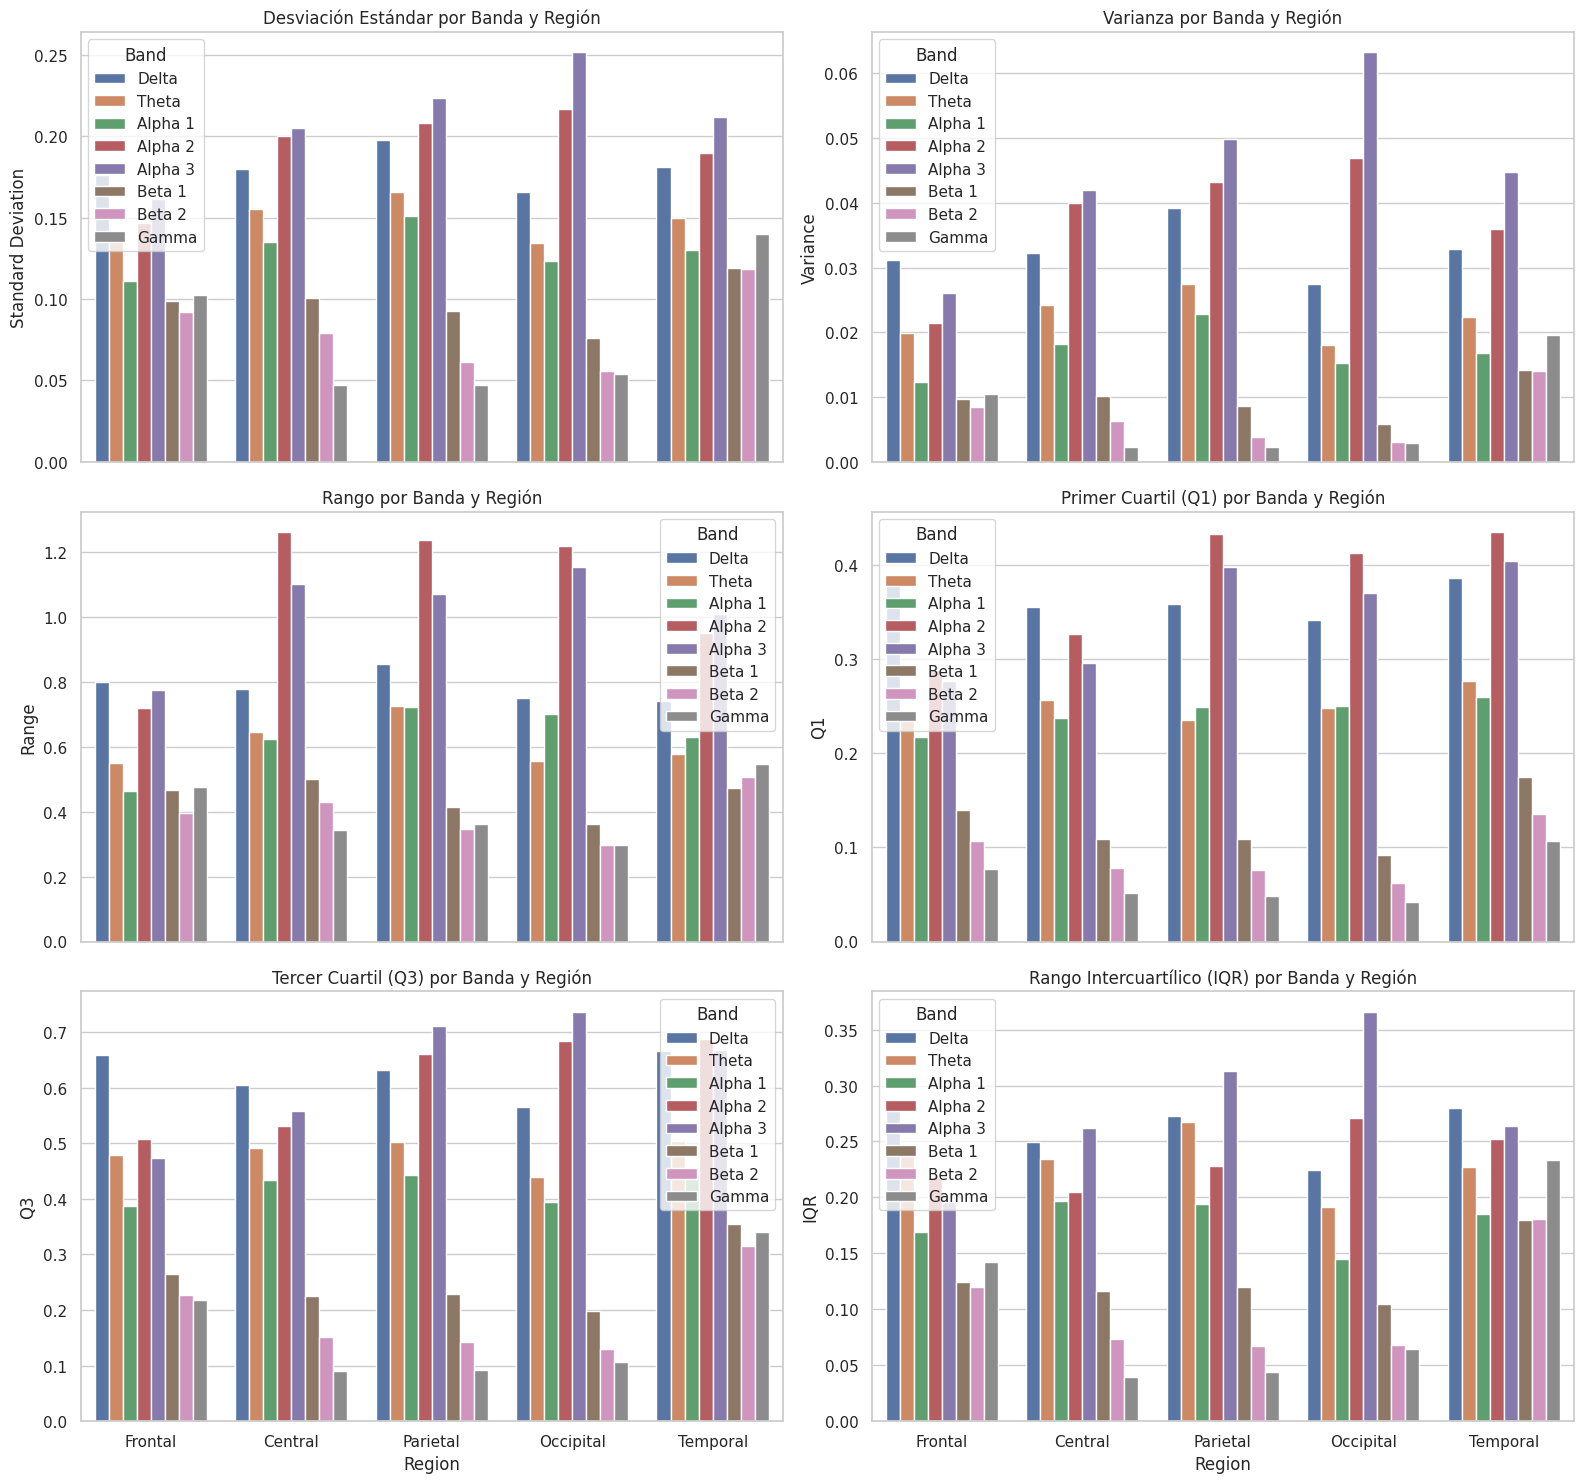

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots to visualize descriptive statistics
fig, axes = plt.subplots(3, 2, figsize=(16, 15), sharex=True)

# Standard Deviation
sns.barplot(x='Region', y='Standard Deviation', hue='Band', data=stats_summary, ax=axes[0, 0])
axes[0, 0].set_title('Standard Deviation by Band and Region')

# Variance
sns.barplot(x='Region', y='Variance', hue='Band', data=stats_summary, ax=axes[0, 1])
axes[0, 1].set_title('Variance by Band and Region')

# Range
sns.barplot(x='Region', y='Range', hue='Band', data=stats_summary, ax=axes[1, 0])
axes[1, 0].set_title('Range by Band and Region')

# First Quartile (Q1)
sns.barplot(x='Region', y='Q1', hue='Band', data=stats_summary, ax=axes[1, 1])
axes[1, 1].set_title('First Quartile (Q1) by Band and Region')

# Third Quartile (Q3)
sns.barplot(x='Region', y='Q3', hue='Band', data=stats_summary, ax=axes[2, 0])
axes[2, 0].set_title('Third Quartile (Q3) by Band and Region')

# Interquartile Range (IQR)
sns.barplot(x='Region', y='IQR', hue='Band', data=stats_summary, ax=axes[2, 1])
axes[2, 1].set_title('Interquartile Range (IQR) by Band and Region')

# Adjust the layout of the plots
plt.tight_layout()
plt.show()

## **Histogram**

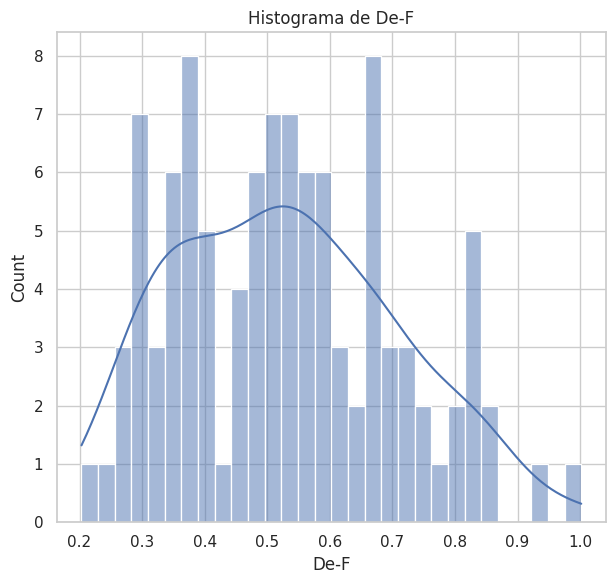

In [ ]:
# Define the column name for the histogram
column_name = f"De-F"

# Create a figure for the histogram
plt.figure(figsize=(12, 6))

# Plot the histogram with KDE (Kernel Density Estimate) on the left side of the figure
plt.subplot(1, 2, 1)
sns.histplot(data_eeg[column_name], bins=30, kde=True)
plt.title(f'Histogram of {column_name}')

# Adjust the layout of the plot
plt.tight_layout()
plt.show()

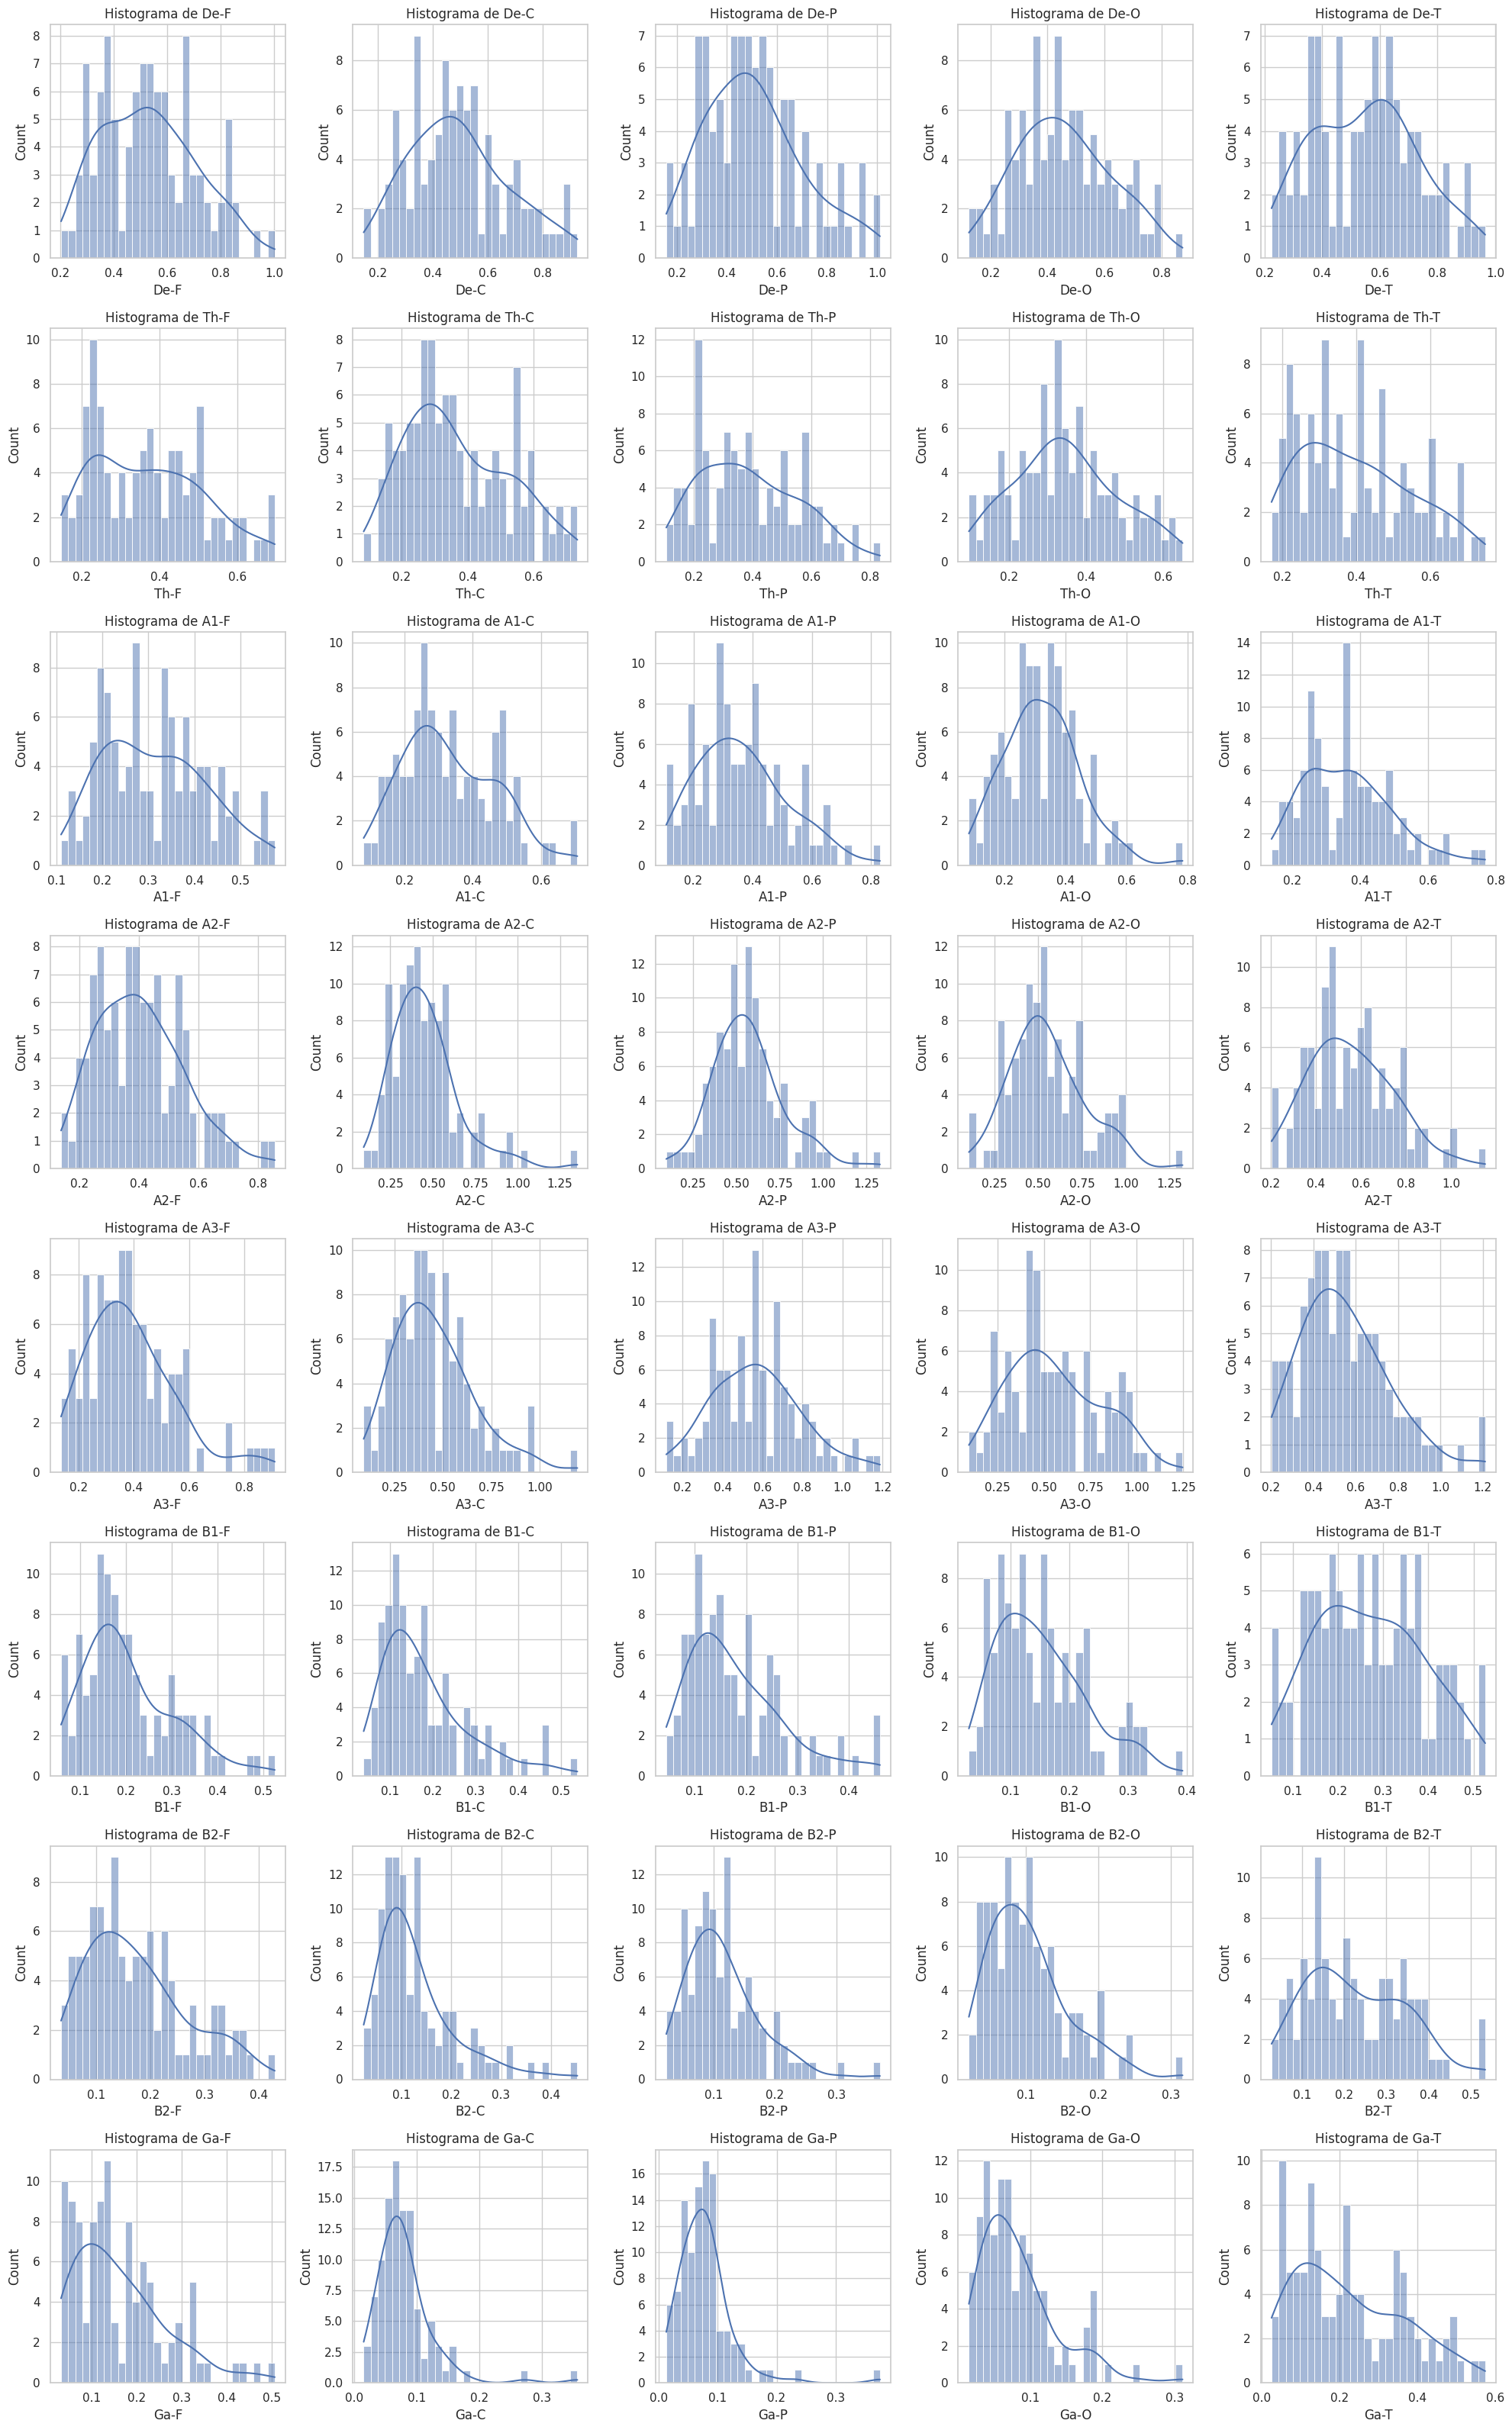

In [ ]:
# Create a figure and a set of subplots
num_plots = len(bands) * len(regions)  # Total number of plots needed
num_cols = 5  # Define an appropriate number of columns
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows required

plt.figure(figsize=(20, 4 * num_rows))  # Create a figure with appropriate size

# Create histograms
plot_index = 1  # Initialize the plot index for subplots
for band_name, band_abbr in bands.items():
    for region in regions:
        column_name = f"{band_abbr}-{region[0]}"  # Construct the column name
        plt.subplot(num_rows, num_cols, plot_index)  # Create a subplot
        if column_name in data_eeg.columns:  # Check if the column exists
            sns.histplot(data_eeg[column_name], bins=30, kde=True)  # Plot histogram with KDE
            plt.title(f'Histogram of {column_name}')  # Set the title of the subplot
        else:
            print(f"Column not found: {column_name}")  # Debug message if the column is not found
        plot_index += 1  # Increment the plot index

plt.tight_layout()  # Adjust the layout to avoid overlap of plots
plt.show()  # Display the plot

## **Boxplot**

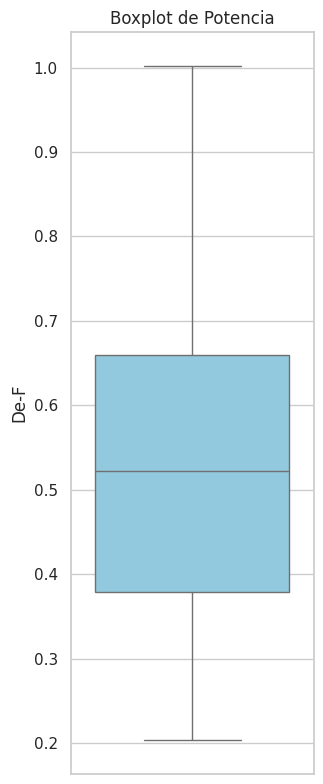

In [ ]:
# Vertical Boxplot
column_name = f"De-F"  # Define the column name for which the boxplot will be created
plt.figure(figsize=(6, 8))  # Create a figure with specified size

# Create a subplot
plt.subplot(1, 2, 2)  # Position of the subplot in the grid
sns.boxplot(y=data_eeg[column_name], color="skyblue")  # Create a vertical boxplot with a specified color
plt.title('Boxplot of Power')  # Set the title of the plot

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()  # Display the plot

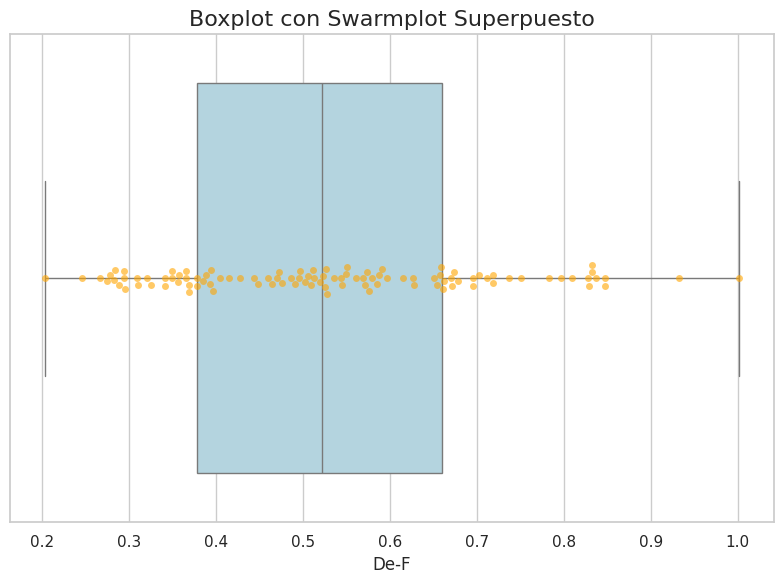

In [ ]:
# Boxplot with Overlaid Swarmplot
column_name = f"De-F"  # Define the column name for which the boxplot will be created
plt.figure(figsize=(8, 6))  # Create a figure with specified size

# Create a boxplot with specified color
sns.boxplot(x=data_eeg[column_name], color="lightblue")
# Overlay a swarmplot with specified color and transparency
sns.swarmplot(x=data_eeg[column_name], color="orange", alpha=0.6)

plt.title('Boxplot with Overlaid Swarmplot', fontsize=16)  # Set the title of the plot with specified font size

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()  # Display the plot

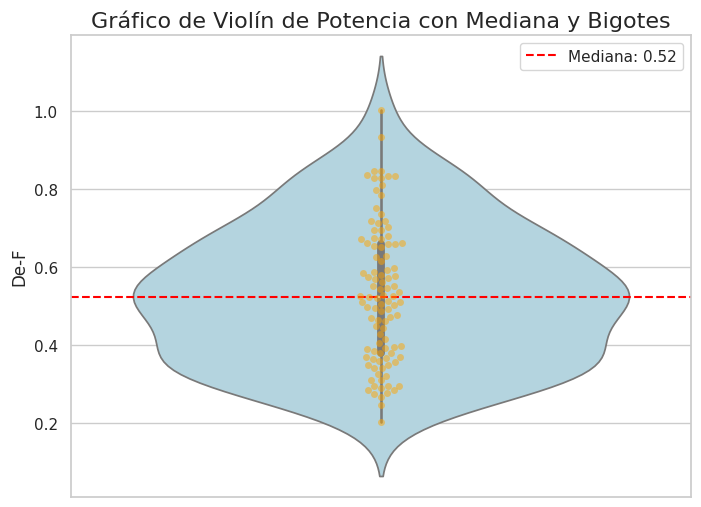

In [ ]:
# Calculate the median
column_name = f"De-F"  # Define the column name for which the median will be calculated
median_value = np.median(data_eeg[column_name])  # Compute the median value

# Create a violin plot
plt.figure(figsize=(8, 6))  # Create a figure with specified size
sns.violinplot(y=data_eeg[column_name], color="lightblue", inner="box")  # Create the violin plot with a box plot inside

# Add the median to the plot
plt.axhline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')  # Add a horizontal line for the median with a label

# Overlay a swarm plot to visualize all data points
sns.swarmplot(y=data_eeg[column_name], color="orange", alpha=0.5)  # Add the swarm plot with specified color and transparency

# Add title and legend
plt.title('Violin Plot of Power with Median and Swarmplot', fontsize=16)  # Set the title of the plot with specified font size
plt.legend()  # Display the legend
plt.show()  # Display the plot

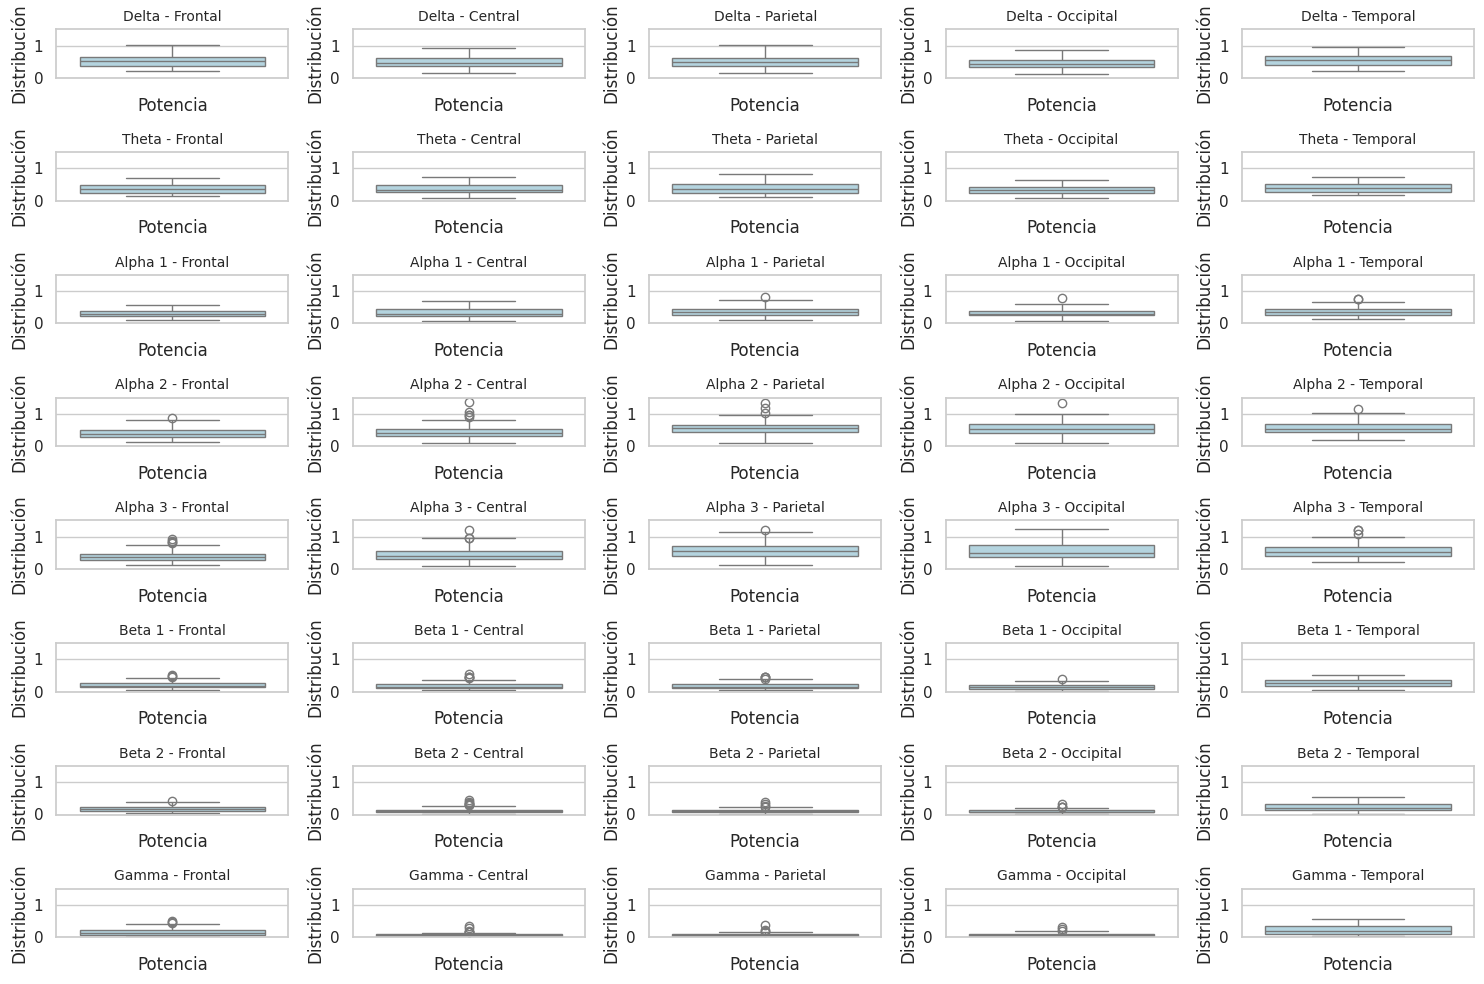

In [ ]:
# Find the minimum and maximum values across all data to set the axis limits
min_value = 0
max_value = 1.5

# Set up the figure for multiple subplots
plt.figure(figsize=(15, 10))  # Define the size of the entire figure

# Initialize a counter for subplot positions
plot_number = 1

# Loop through all combinations of bands and regions
for band_name, band_abbr in bands.items():
    for region in regions:
        column_name = f"{band_abbr}-{region[0]}"  # Construct the column name based on band and region
        if column_name in data_eeg.columns:  # Check if the column exists in the DataFrame
            plt.subplot(len(bands), len(regions), plot_number)  # Define subplot position
            sns.boxplot(y=data_eeg[column_name], color="lightblue")  # Create a boxplot
            plt.title(f'{band_name} - {region}', fontsize=10)  # Set the title for each subplot
            plt.ylim(min_value, max_value)  # Set consistent y-axis limits
            plt.xlabel('Power')  # Label for the x-axis
            plt.ylabel('Distribution')  # Label for the y-axis
            plot_number += 1  # Increment the subplot counter
        else:
            print(f"Column not found: {column_name}")  # Debug message for missing columns

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

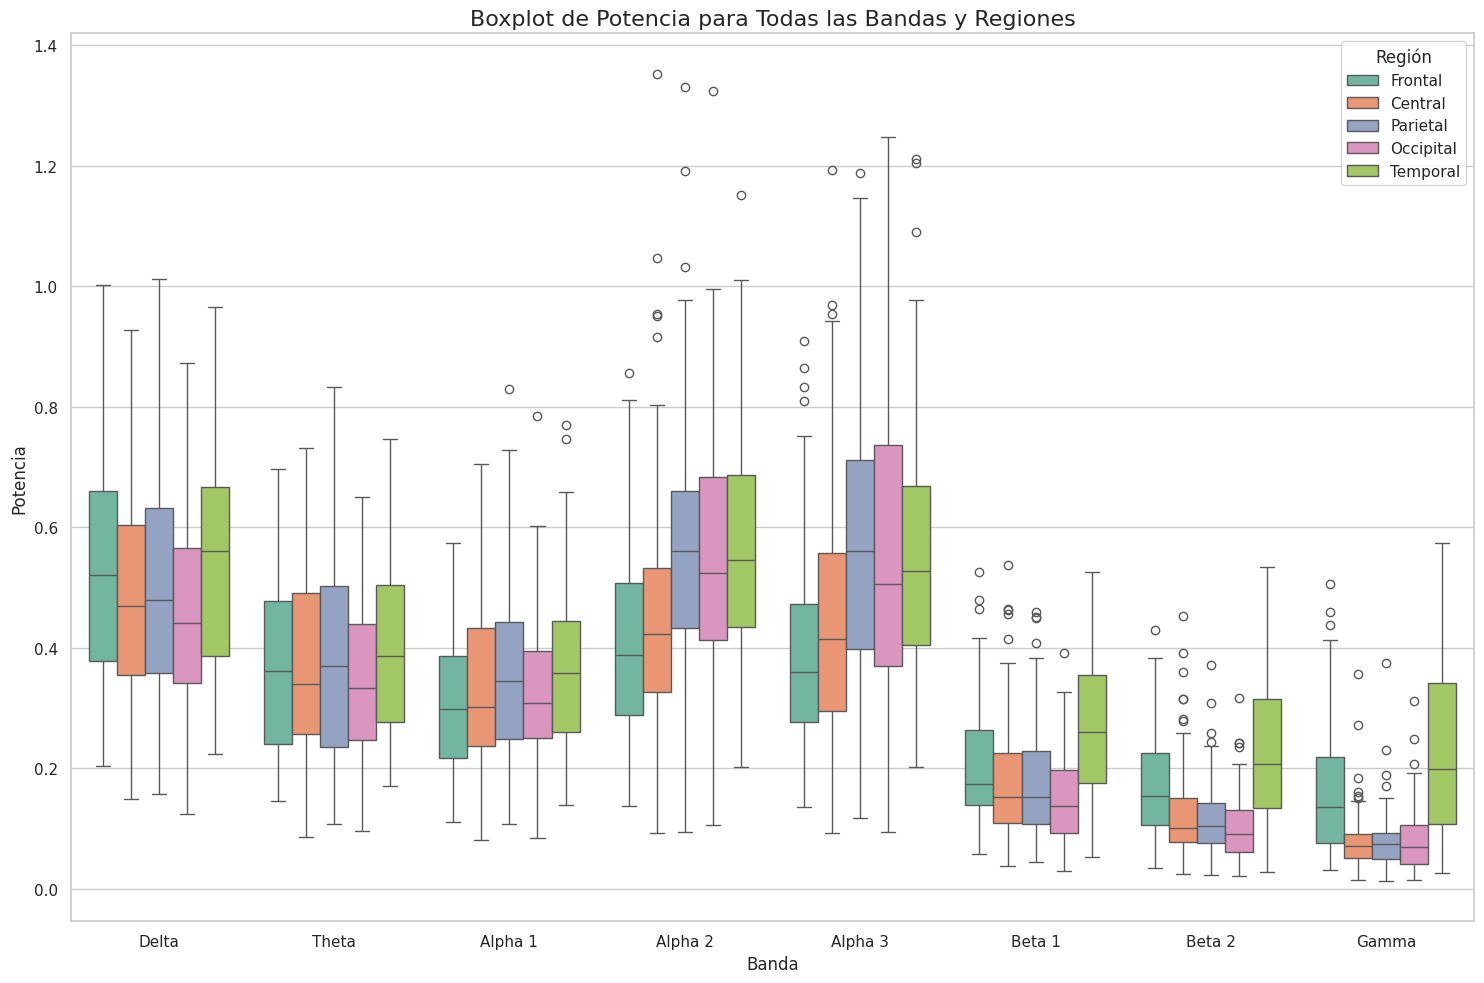

In [ ]:
# Prepare a DataFrame to store all the data
boxplot_data = []

# Loop through all combinations of bands and regions
for band_name, band_abbr in bands.items():
    for region in regions:
        column_name = f"{band_abbr}-{region[0]}"  # Construct the column name based on band and region
        if column_name in data_eeg.columns:  # Check if the column exists in the DataFrame
            # Add the data to the DataFrame
            data_temp = data_eeg[column_name].copy()  # Copy the data to avoid modifying the original DataFrame
            data_temp = pd.DataFrame({
                'Power': data_temp,  # Rename 'Potencia' to 'Power' for consistency
                'Band': band_name,
                'Region': region
            })
            boxplot_data.append(data_temp)  # Append the data to the list
        else:
            print(f"Column not found: {column_name}")  # Debug message for missing columns

# Combine all data into a single DataFrame
boxplot_data = pd.concat(boxplot_data)

# Plot all boxes in a single plot
plt.figure(figsize=(15, 10))  # Define the size of the figure
sns.boxplot(x='Band', y='Power', hue='Region', data=boxplot_data, palette='Set2')  # Create the boxplot
plt.title('Boxplot of Power for All Bands and Regions', fontsize=16)  # Set the title of the plot
plt.xlabel('Band')  # Label for the x-axis
plt.ylabel('Power')  # Label for the y-axis
plt.legend(title='Region')  # Add a legend with title
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

# **Feature Selection**

## **Data**

### **Rescale**

In [ ]:
## Import StandardScaler from scikit-learn
#from sklearn.preprocessing import StandardScaler
#
## Normalize the data
#scaler = StandardScaler()  # Create an instance of StandardScaler
#X_scaled = scaler.fit_transform(X)  # Fit the scaler to the data and transform it

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler from scikit-learn

# Create a MinMaxScaler instance to scale values between 0 and 1
scaler = MinMaxScaler()

# Select the columns that need to be scaled
columns_to_scale = ['Age', 'Education']

# Fit the scaler to the selected columns and transform them
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the first few rows of the scaled columns to verify the transformation
print(df[columns_to_scale].head())

       Age  Education
0  0.28125       0.25
1  0.12500       0.60
2  0.28125       0.25
3  0.18750       0.75
4  0.12500       0.80


In [ ]:
print(df.describe())  # Print descriptive statistics of the DataFrame to verify the range of values

            Unit         Age         Sex   Education       MMSEg    MMSEcorr  \
count  104.00000  104.000000  104.000000  104.000000  104.000000  104.000000   
mean     2.00000    0.556490    0.615385    0.500481   24.557692   23.569231   
std      0.85899    0.220888    0.488860    0.210235    5.174296    5.161980   
min      1.00000    0.000000    0.000000    0.000000    8.000000    7.000000   
25%      1.00000    0.429688    0.000000    0.387500   21.000000   19.300000   
50%      2.00000    0.593750    1.000000    0.500000   26.000000   25.250000   
75%      3.00000    0.718750    1.000000    0.650000   29.000000   27.700000   
max      3.00000    1.000000    1.000000    1.000000   30.000000   30.000000   

               TF         IAF  UPDRS III        De-F  ...        Ga-F  \
count  104.000000  104.000000  41.000000  104.000000  ...  104.000000   
mean     5.197115    7.879808  39.341463    0.529842  ...    0.159798   
std      1.050701    1.532013  19.629837    0.176415  ...   

### **Prepare dataset**

In [ ]:
# Get the columns of the DataFrame
columns = df.columns

# Replace '-' with '_' only for columns that start with a band abbreviation
new_columns = []
for col in columns:
    # Check if the column starts with any of the band abbreviations
    if any(col.startswith(abbr) for abbr in bands.values()):
        # Replace '-' with '_' in the column name
        new_col = col.replace('-', '_')
    else:
        new_col = col
    new_columns.append(new_col)

# Assign the new column names to the DataFrame
df.columns = new_columns

# Check the updated column names
print(df.columns)

# Create a list of columns to be included for each band and region
eeg_columns = [f"{band_abbr}_{region[0]}" for band_abbr in bands.values() for region in regions]

# Add the global columns to the list
eeg_columns += [f"{band_abbr}_global" for band_abbr in bands.values()]

print(eeg_columns)

Index(['Subj', 'Group', 'Unit', 'Age', 'Sex', 'Education', 'MMSEg', 'MMSEcorr',
       'TF', 'IAF', 'UPDRS III', 'De_F', 'De_C', 'De_P', 'De_O', 'De_T',
       'De_L', 'Th_F', 'Th_C', 'Th_P', 'Th_O', 'Th_T', 'Th_L', 'A1_F', 'A1_C',
       'A1_P', 'A1_O', 'A1_T', 'A1_L', 'A2_F', 'A2_C', 'A2_P', 'A2_O', 'A2_T',
       'A2_L', 'A3_F', 'A3_C', 'A3_P', 'A3_O', 'A3_T', 'A3_L', 'B1_F', 'B1_C',
       'B1_P', 'B1_O', 'B1_T', 'B1_L', 'B2_F', 'B2_C', 'B2_P', 'B2_O', 'B2_T',
       'B2_L', 'Ga_F', 'Ga_C', 'Ga_P', 'Ga_O', 'Ga_T', 'Ga_L', 'De_global',
       'Th_global', 'A1_global', 'A3_global'],
      dtype='object')
['De_F', 'De_C', 'De_P', 'De_O', 'De_T', 'Th_F', 'Th_C', 'Th_P', 'Th_O', 'Th_T', 'A1_F', 'A1_C', 'A1_P', 'A1_O', 'A1_T', 'A2_F', 'A2_C', 'A2_P', 'A2_O', 'A2_T', 'A3_F', 'A3_C', 'A3_P', 'A3_O', 'A3_T', 'B1_F', 'B1_C', 'B1_P', 'B1_O', 'B1_T', 'B2_F', 'B2_C', 'B2_P', 'B2_O', 'B2_T', 'Ga_F', 'Ga_C', 'Ga_P', 'Ga_O', 'Ga_T', 'De_global', 'Th_global', 'A1_global', 'A2_global', 'A3_global', 

In [ ]:
# Include demographic and EEG feature columns in X
desired_columns = ['Age', 'Sex', 'Education', 'MMSEg'] + eeg_columns

# Filter the columns to include only those that exist in the DataFrame
existing_columns = [col for col in desired_columns if col in df.columns]

# Select the relevant columns from the DataFrame
X = df[existing_columns]

# Print the first few rows of X to verify that the columns are correct
print(X.head())

       Age  Sex  Education  MMSEg      De_F      De_C      De_P      De_O  \
0  0.28125    0       0.25     29  0.294859  0.293578  0.316497  0.216274   
1  0.12500    0       0.60     29  0.349184  0.341930  0.322204  0.359562   
2  0.28125    0       0.25     30  0.293917  0.461873  0.489298  0.523242   
3  0.18750    0       0.75     29  0.511214  0.354944  0.429648  0.400533   
4  0.12500    1       0.80     28  0.505590  0.348480  0.293596  0.349682   

       De_T      Th_F  ...      B2_T      Ga_F      Ga_C      Ga_P      Ga_O  \
0  0.356894  0.201139  ...  0.386256  0.506201  0.272497  0.078661  0.053723   
1  0.382375  0.227095  ...  0.294544  0.135269  0.062833  0.086813  0.095959   
2  0.550812  0.206898  ...  0.207654  0.076700  0.078579  0.078238  0.087077   
3  0.733240  0.442849  ...  0.141929  0.068814  0.030874  0.027713  0.022462   
4  0.687626  0.241463  ...  0.137852  0.108541  0.028565  0.022697  0.034459   

       Ga_T  De_global  Th_global  A1_global  A3_global 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create the label encoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the dependent variable 'Group'
y = label_encoder.fit_transform(df['Group'])

# Create a mapping dictionary
group_mapping = {'HC': 0, 'PDD': 1}

# Map the values in the 'Group' column using the mapping dictionary
y = df['Group'].map(group_mapping)

# Verify the encoded classes
print(label_encoder.classes_)  # Print the classes learned by the label encoder
print(y.unique())  # Print unique values in the transformed 'Group' column

['HC' 'PDD']
[0 1]


## **Others**

### **Lasso**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regression model with a regularization parameter alpha
lasso = Lasso(alpha=0.01)

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

# Select features that have non-zero coefficients
selected_features = X_train.columns[(lasso.coef_ != 0)]

In [ ]:
#This will output the list of feature names that Lasso determined to be significant for the target variable.
print(selected_features)

Index(['Sex', 'MMSEg', 'De_P', 'De_O', 'De_T', 'A1_T'], dtype='object')

### **RandomForest**

In [ ]:
# RandomForestClassifier from sklearn.ensemble is used to create the Random Forest model.
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': features[sorted_indices],
    'Importance': importances[sorted_indices]
})

# Print the DataFrame
print(importance_df)

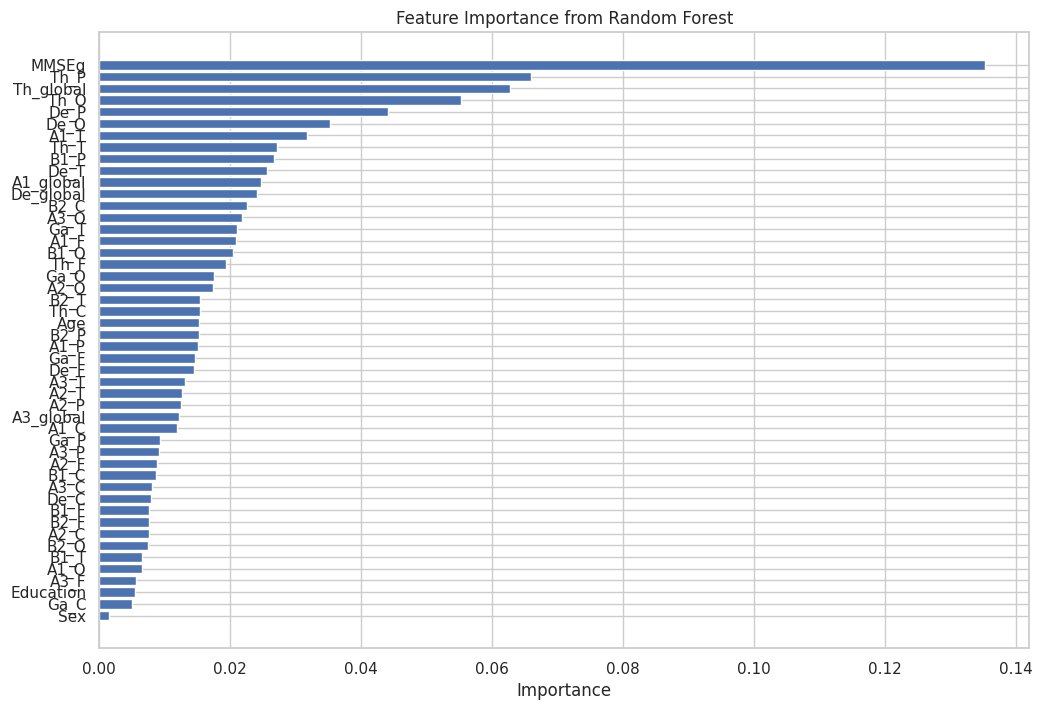

      Feature  Importance
0       MMSEg    0.135292
1        Th_P    0.066011
2   Th_global    0.062754
3        Th_O    0.055278
4        De_P    0.044109
5        De_O    0.035167
6        A1_T    0.031717
7        Th_T    0.027118
8        B1_P    0.026737
9        De_T    0.025580
10  A1_global    0.024766
11  De_global    0.024110
12       B2_C    0.022539
13       A3_O    0.021790
14       Ga_T    0.021025
15       A1_F    0.020868
16       B1_O    0.020435
17       Th_F    0.019347
18       Ga_O    0.017579
19       A2_O    0.017297
20       B2_T    0.015428
21       Th_C    0.015370
22        Age    0.015236
23       B2_P    0.015187
24       A1_P    0.015033
25       Ga_F    0.014602
26       De_F    0.014536
27       A3_T    0.013068
28       A2_T    0.012574
29       A2_P    0.012552
30  A3_global    0.012195
31       A1_C    0.011899
32       Ga_P    0.009242
33       A3_P    0.009101
34       A2_F    0.008863
35       B1_C    0.008719
36       A3_C    0.008056
37       De_

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Plot a horizontal bar chart for feature importances
plt.barh(importance_df['Feature'], importance_df['Importance'])

# Label the x-axis
plt.xlabel('Importance')

# Set the title of the chart
plt.title('Feature Importance from Random Forest')

# Invert the y-axis so that the feature with the highest importance is at the top
plt.gca().invert_yaxis()

# Render and display the plot
plt.show()

# Print the DataFrame containing feature importances
print(importance_df)

### **PCA**

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components to reduce dimensionality
pca = PCA(n_components=2)

# Fit PCA on the data and transform it to 2 principal components
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results with column names 'PC1' and 'PC2'
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the target variable 'Group' to the PCA DataFrame for visualization
# Reset index to align with PCA DataFrame index
pca_df['Group'] = y.reset_index(drop=True)


Etiquetas originales: ['0', '1']


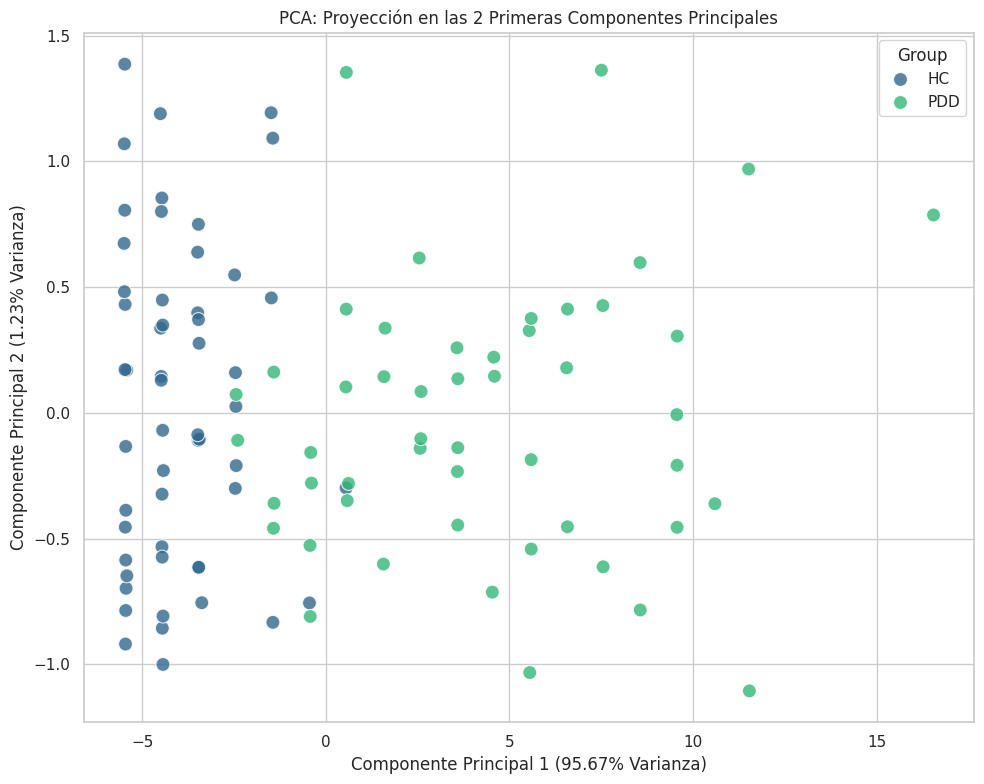

In [ ]:
# Create a scatter plot to visualize the PCA results with original groups
plt.figure(figsize=(10, 8))

# Plot scatter with PCA components PC1 and PC2, coloring by 'Group' with 'viridis' palette
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df, palette='viridis', s=100, alpha=0.8)

# Adjust the legend to show 'HC' and 'PDD' instead of numerical labels
legend_labels = {0: 'HC', 1: 'PDD'}
handles, labels = scatter.get_legend_handles_labels()

# Print the original legend labels for debugging
print("Original labels:", labels)

# Map the original numeric labels to their descriptive names
labels = [legend_labels[int(float(label))] for label in labels[:]]

# Update the legend with the new labels
scatter.legend(handles, labels, title='Group')

# Add title and axis labels including the explained variance ratios
plt.title('PCA: Projection on the 2 Main Principal Components')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')

# Adjust layout to prevent overlapping of elements and show the plot
plt.tight_layout()
plt.show()

### **Chi-Square**

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Convert features and target to numerical values if necessary
X_encoded = X.apply(LabelEncoder().fit_transform)  # Apply LabelEncoder to encode categorical features
y_encoded = LabelEncoder().fit_transform(y)  # Encode the target variable

# Select the top 5 features based on the Chi-Square test
chi2_selector = SelectKBest(score_func=chi2, k=5)  # Initialize SelectKBest with Chi-Square test and select 5 best features
X_chi2 = chi2_selector.fit_transform(X_encoded, y_encoded)  # Fit and transform the feature set using the Chi-Square test

# Get the selected features
selected_features = X.columns[chi2_selector.get_support()]  # Retrieve the names of the selected features
print("Selected features by Chi-Square:", selected_features)  # Print the names of the selected features

Características seleccionadas por Chi-Cuadrado: Index(['Th_F', 'Th_P', 'De_global', 'Th_global', 'A1_global'], dtype='object')


### **Mutual information**

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder

# Convert the target variable to numerical values if necessary
y_encoded = LabelEncoder().fit_transform(y)  # Encode the target variable using LabelEncoder

# Select the top 5 features based on mutual information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=5)  # Initialize SelectKBest with mutual information and select 5 best features
X_mi = mi_selector.fit_transform(X, y_encoded)  # Fit and transform the feature set using mutual information

# Get the selected features
selected_features = X.columns[mi_selector.get_support()]  # Retrieve the names of the selected features
print("Features selected by Mutual Information:", selected_features)  # Print the names of the selected features

Características seleccionadas por Informatividad Mutua: Index(['MMSEg', 'De_O', 'Th_P', 'De_global', 'Th_global'], dtype='object')


### **ANOVA**

In [ ]:
df

,Subj,Group,Unit,Age,Sex,Education,MMSEg,MMSEcorr,TF,IAF,...,Ga_F,Ga_C,Ga_P,Ga_O,Ga_T,Ga_L,De_global,Th_global,A1_global,A3_global
0,Istanbul_HC_faledev1,HC,1,0.28125,0,0.25,29,29.0,4.5,10.0,...,0.506201,0.272497,0.078661,0.053723,0.435926,0.132839,0.271208,0.174212,0.149279,0.332717
1,Istanbul_HC_falisog1,HC,1,0.12500,0,0.60,29,29.0,6.0,10.0,...,0.135269,0.062833,0.086813,0.095959,0.360152,0.043232,0.336950,0.230216,0.207011,0.501268
2,Istanbul_HC_falmasi1,HC,1,0.28125,0,0.25,30,30.0,5.5,8.5,...,0.076700,0.078579,0.078238,0.087077,0.208819,0.041912,0.425909,0.284990,0.260351,0.591459
3,Istanbul_HC_falmyel1,HC,1,0.18750,0,0.75,29,29.0,4.0,7.0,...,0.068814,0.030874,0.027713,0.022462,0.108711,0.018712,0.450753,0.396862,0.333317,0.824551
4,Istanbul_HC_falmyil1,HC,1,0.12500,1,0.80,28,28.0,6.0,9.5,...,0.108541,0.028565,0.022697,0.034459,0.125239,0.025743,0.397387,0.224540,0.156795,0.582360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,NewCastle_PDD_veeg15,PDD,3,0.68750,1,0.50,27,25.4,4.0,6.5,...,0.094793,0.090369,0.085856,0.095031,0.140250,0.036940,0.684472,0.543441,0.453188,0.460693
100,NewCastle_PDD_veeg39,PDD,3,0.62500,1,0.50,14,12.4,4.0,6.0,...,0.182388,0.092736,0.137602,0.154296,0.309912,0.053913,0.702860,0.509805,0.384683,0.243941
101,NewCastle_PDD_veeg48,PDD,3,0.62500,0,0.60,27,25.4,4.0,6.5,...,0.192070,0.356438,0.374956,0.311274,0.194528,0.124591,0.439533,0.376506,0.336804,0.375846
102,NewCastle_PDD_veeg49,PDD,3,0.75000,1,0.50,22,21.0,4.0,6.5,...,0.046984,0.160380,0.189291,0.206459,0.056885,0.051466,0.543187,0.408995,0.330430,0.645904


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kstest, norm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.feature_selection import SelectKBest, f_classif

# List of all metrics to compare
metrics = X.columns  # Extract the column names from the feature set

# Dictionary to store results for each metric
results = {}

# Iterate over each metric to perform statistical tests
for metric in metrics:
    try:
        # Perform ANOVA
        formula = f'{metric} ~ C(Group)'  # Define the formula for ANOVA
        model = ols(formula, data=df).fit()  # Fit the OLS model using the formula
        anova_table = sm.stats.anova_lm(model, typ=2)  # Perform ANOVA and get the results

        # Perform normality test
        stat, p_value = kstest(df[metric], norm.cdf)  # Perform Kolmogorov-Smirnov test for normality

        # Save results
        results[metric] = {
            'anova': anova_table,  # Save ANOVA table
            'normality_p_value': p_value  # Save p-value from normality test
        }

        # Print ANOVA results and normality p-value
        print(f'ANOVA results for {metric}:')
        print(anova_table)
        print(f'Normality p-value for {metric}: {p_value}')

        # Apply logarithmic transformation if p-value is significant
        if p_value < 0.05:
            df[f'log_{metric}'] = np.log(df[metric] + 1)  # Apply log transformation (+1 to avoid log(0))
            print(f'Logarithmic transformation applied to {metric}')

    except Exception as e:
        # Print error message if there's an issue with processing the metric
        print(f'Error processing metric {metric}: {e}')

# Perform Tukey's HSD test for post-hoc analysis
for metric in metrics:
    if metric in df.columns:
        tukey = pairwise_tukeyhsd(df[metric], df['Group'])  # Perform Tukey's HSD test
        print(f'Tukey HSD test results for {metric}:')
        print(tukey)

# Feature selection using ANOVA
k = 20  # Number of best features to select
anova_selector = SelectKBest(score_func=f_classif, k=k)  # Initialize ANOVA selector
X_selected = anova_selector.fit_transform(X, y)  # Fit and transform the feature set to select top k features

ANOVA results for Age:
            sum_sq     df         F    PR(>F)
C(Group)  0.047714    1.0  0.977699  0.325107
Residual  4.977827  102.0       NaN       NaN
Normalidad p-value para Age: 7.68366914951999e-28
Aplicada transformación logarítmica a Age
ANOVA results for Sex:
             sum_sq     df          F    PR(>F)
C(Group)   2.609459    1.0  12.095141  0.000744
Residual  22.005926  102.0        NaN       NaN
Normalidad p-value para Sex: 1.4428157671448415e-24
Aplicada transformación logarítmica a Sex
ANOVA results for Education:
            sum_sq     df         F    PR(>F)
C(Group)  0.072722    1.0  1.655821  0.201081
Residual  4.479754  102.0       NaN       NaN
Normalidad p-value para Education: 6.109377611226751e-28
Aplicada transformación logarítmica a Education
ANOVA results for MMSEg:
               sum_sq     df           F        PR(>F)
C(Group)  1762.092365    1.0  180.534728  2.663467e-24
Residual   995.561481  102.0         NaN           NaN
Normalidad p-value para 

In [ ]:
cont = 1  # Initialize a counter for significant metrics

# Iterate through each metric and its corresponding result
for metric, result in results.items():
    # Check if the p-value for the group effect in ANOVA is less than 0.05
    if result['anova'].loc['C(Group)', 'PR(>F)'] < 0.05:
        # If significant, print the metric and increment the counter
        print(f'{cont}. Metric {metric} shows a significant difference between groups.')
        cont += 1
    # Uncomment the following block to print metrics with no significant difference
    # else:
    #     print(f'Metric {metric} does not show a significant difference between groups.')

1. Métrica Sex muestra una diferencia significativa entre grupos.
2. Métrica MMSEg muestra una diferencia significativa entre grupos.
3. Métrica De_F muestra una diferencia significativa entre grupos.
4. Métrica De_C muestra una diferencia significativa entre grupos.
5. Métrica De_P muestra una diferencia significativa entre grupos.
6. Métrica De_O muestra una diferencia significativa entre grupos.
7. Métrica De_T muestra una diferencia significativa entre grupos.
8. Métrica Th_F muestra una diferencia significativa entre grupos.
9. Métrica Th_C muestra una diferencia significativa entre grupos.
10. Métrica Th_P muestra una diferencia significativa entre grupos.
11. Métrica Th_O muestra una diferencia significativa entre grupos.
12. Métrica Th_T muestra una diferencia significativa entre grupos.
13. Métrica A1_F muestra una diferencia significativa entre grupos.
14. Métrica A1_C muestra una diferencia significativa entre grupos.
15. Métrica A1_P muestra una diferencia significativa ent

In [ ]:
# Print the F-scores and p-values from the ANOVA feature selection
print("F-scores:", anova_selector.scores_)
print("P-values:", anova_selector.pvalues_)

F-scores: [9.77699226e-01 1.20951414e+01 1.65582101e+00 1.80534728e+02
 3.49964121e+01 2.57353864e+01 4.55244077e+01 3.82024631e+01
 4.04424923e+01 5.39089434e+01 3.24630577e+01 5.28623859e+01
 4.32288105e+01 4.89304328e+01 4.98520497e+01 2.91058429e+01
 3.88305236e+01 2.63924505e+01 3.30811195e+01 1.21257966e+00
 9.42775021e-01 1.70694608e-01 9.73537289e+00 1.54051246e+00
 1.22362781e-01 5.15112010e-01 5.07185631e+00 1.87990555e+01
 3.79968758e+00 4.96229474e+00 1.53231367e+01 2.02654378e+01
 2.02145952e+01 1.94737105e+00 3.27135183e+00 1.49938955e+01
 6.27100651e+00 1.01869541e+00 1.15370512e-01 1.37516672e-01
 8.73304334e-03 2.86968722e+00 2.50600855e+00 3.01530100e+00
 5.55773786e+01 6.99649099e+01 5.58576471e+01 6.28019379e+00]
P-values: [3.25107290e-01 7.44497658e-04 2.01081235e-01 2.66346724e-24
 4.44556652e-08 1.76184989e-06 9.32241367e-10 1.32573156e-08
 5.79425400e-09 5.26975022e-11 1.18241740e-07 7.47514746e-11
 2.10995978e-09 2.84348551e-10 2.07220278e-10 4.46368520e-07
 1.

*Relative F-score*: SelectKBest relies on the F-score to select features, which measures the ratio of the variance explained between groups to the variance within groups. Even if a feature has a significant p-value in ANOVA, its F-score may not be high enough compared to other features. Solution: Review the F-scores of all features to understand why some features were not selected. If necessary, you can use another feature selection method that also considers the p-value.

In [ ]:
# Get the indices of the selected features
selected_features = anova_selector.get_support(indices=True)

# Print the indices of the selected features
print("Selected feature indices:", selected_features)

# Print the names of the selected features
print("Selected features:", [X.columns[i] for i in selected_features])

Selected feature indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 31 44 45 46]
Selected features: ['MMSEg', 'De_F', 'De_C', 'De_P', 'De_O', 'De_T', 'Th_F', 'Th_C', 'Th_P', 'Th_O', 'Th_T', 'A1_F', 'A1_C', 'A1_P', 'A1_O', 'A1_T', 'B1_P', 'De_global', 'Th_global', 'A1_global']


### **Correlation matrix**

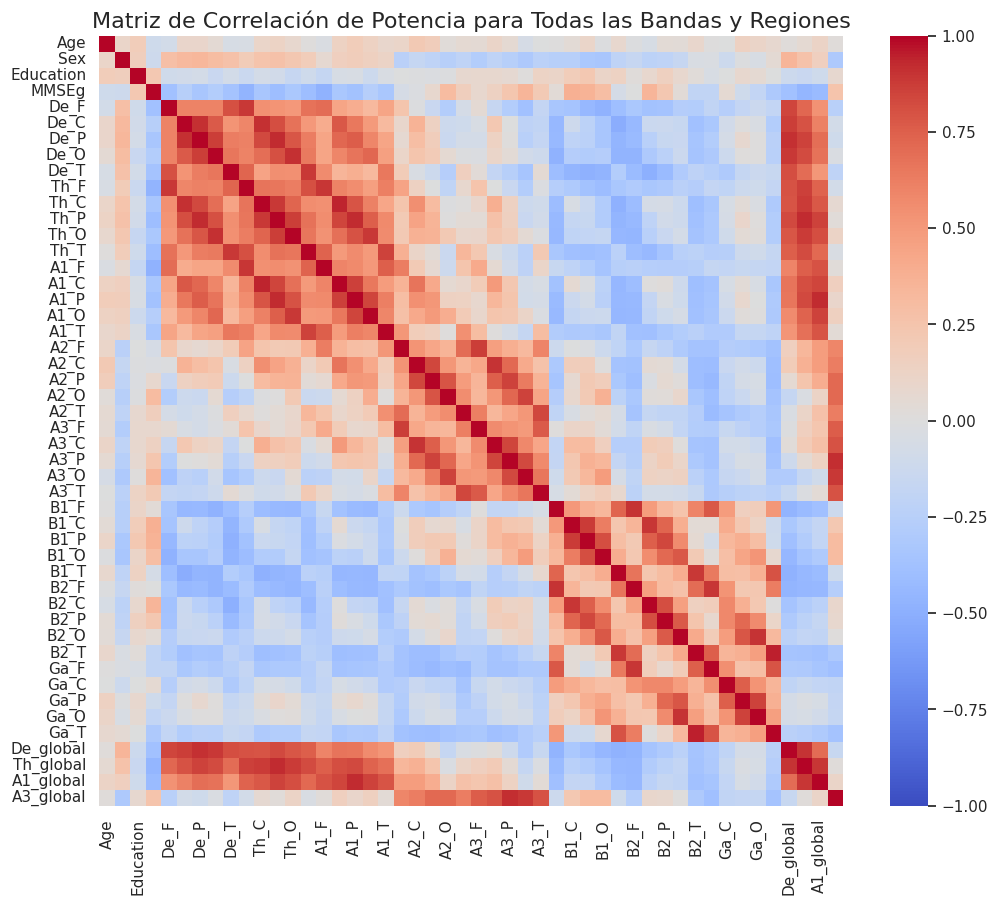

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Power for All Bands and Regions', fontsize=16)
plt.show()

Características a eliminar: {'A3_C', 'A1_global', 'Th_P', 'De_P', 'A1_P', 'B2_F', 'A3_global', 'Th_C', 'Th_O', 'Ga_O', 'De_global', 'Th_global', 'Ga_T', 'A1_C'}


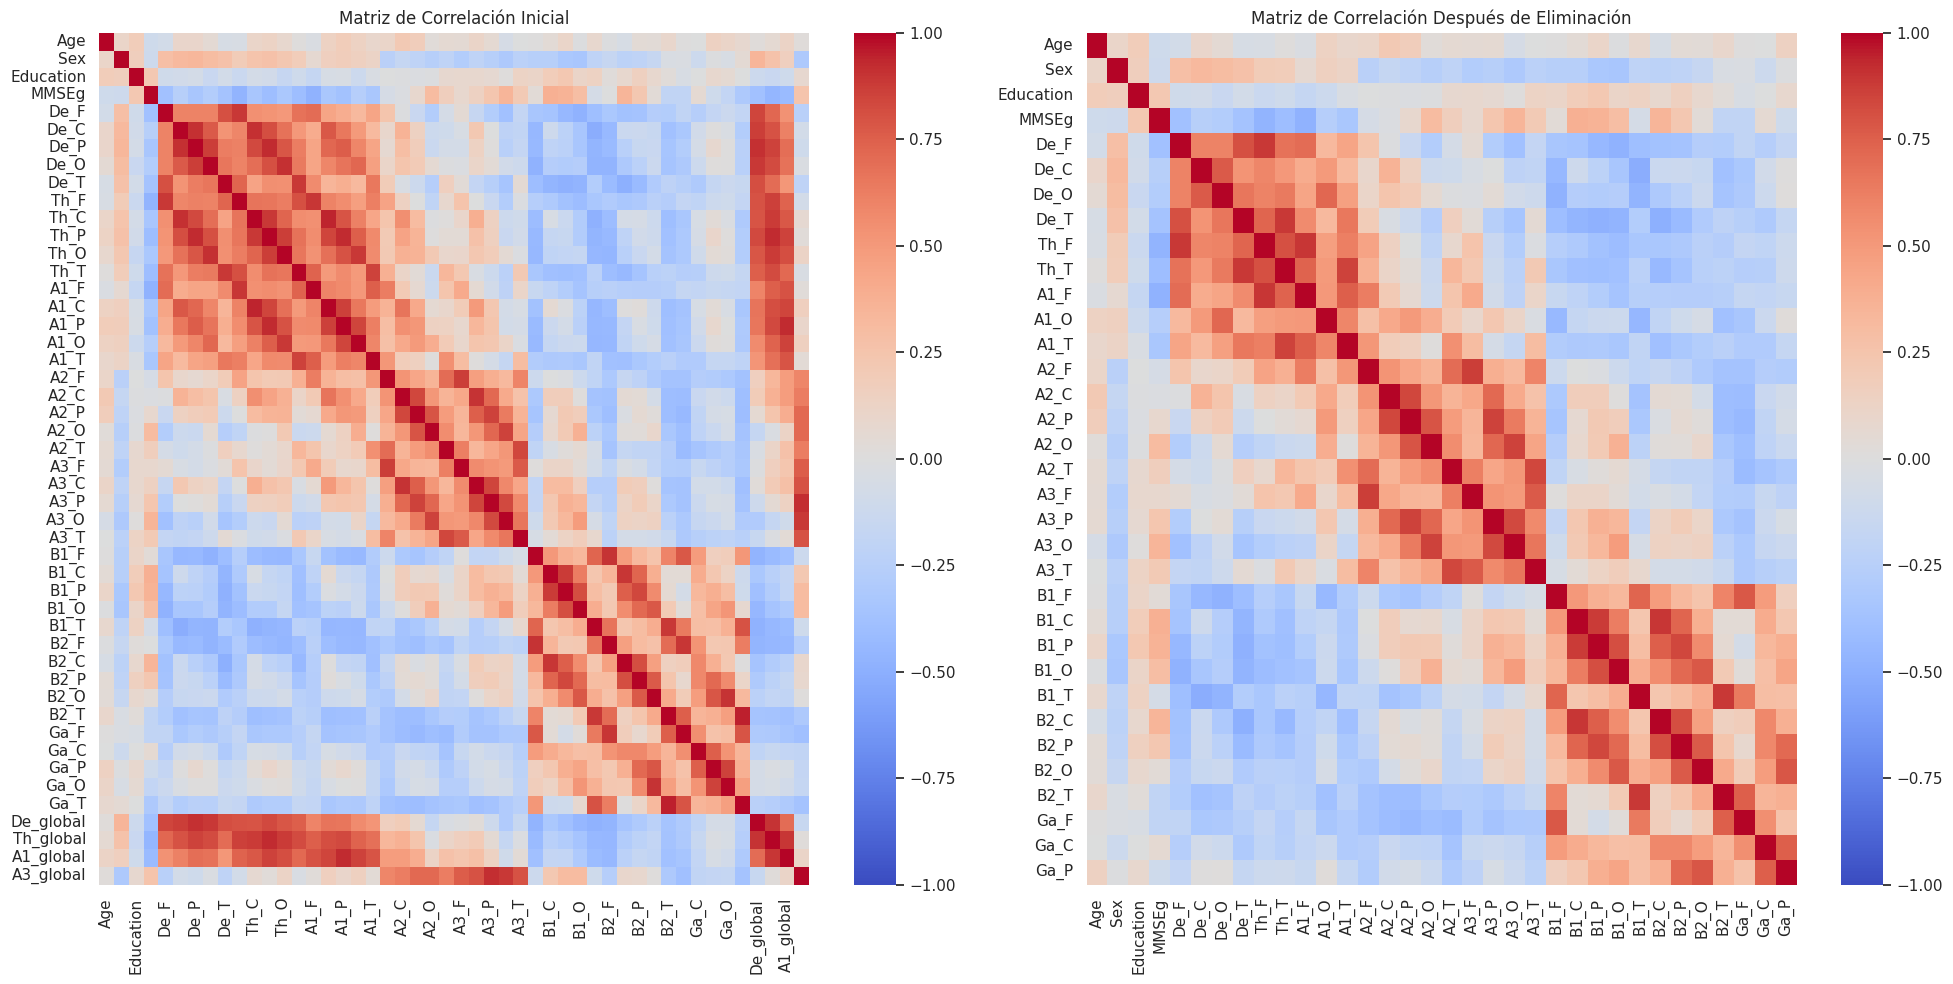

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = X.corr()

# Threshold for removing highly correlated features
threshold = 0.9

# Identify features to drop
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

print(f"Features to drop: {to_drop}")

# Remove highly correlated features
df_corr_reduced = X.drop(columns=to_drop)

# Calculate the new correlation matrix
corr_matrix_reduced = df_corr_reduced.corr()

# Plot both correlation matrices side by side
plt.figure(figsize=(20, 10))

# First subplot: Initial correlation matrix
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Initial Correlation Matrix')

# Second subplot: Correlation matrix after removal
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix_reduced, annot=False, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix After Removal')

plt.tight_layout()
plt.show()

# Create a DataFrame with the remaining features
df_final = df_corr_reduced.copy()

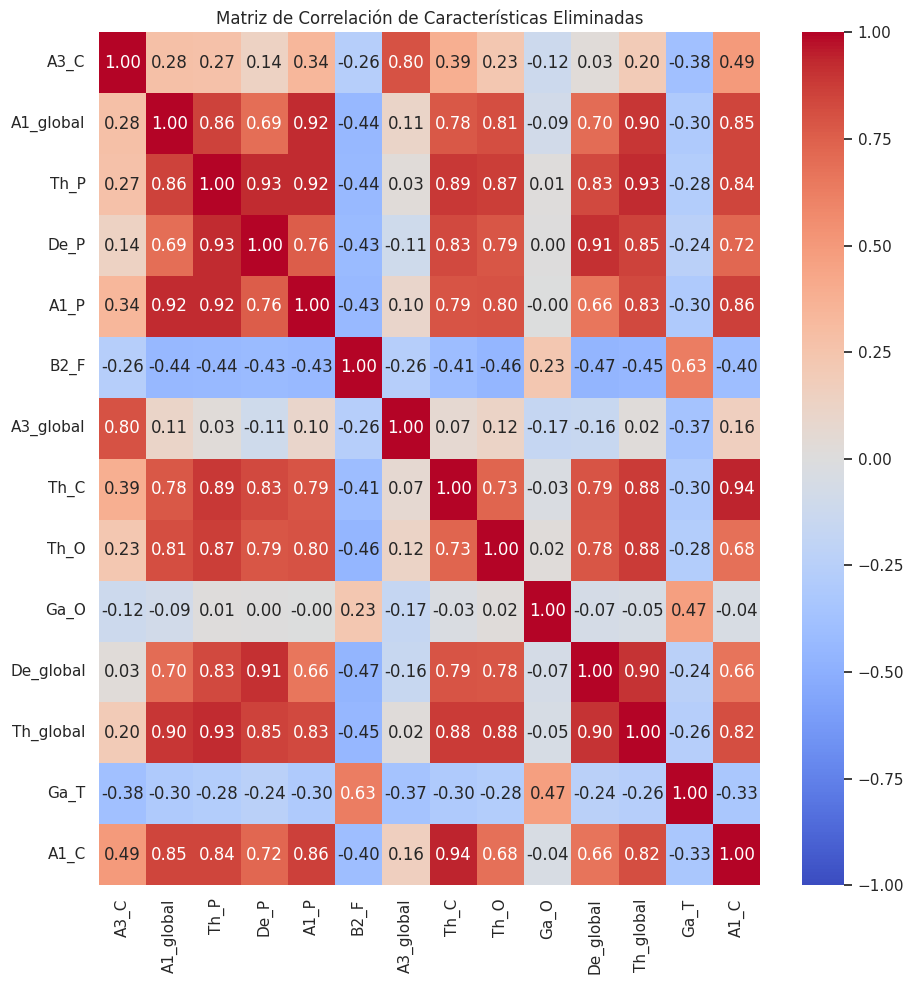

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to list for indexing
to_drop_list = list(to_drop)

# Remove highly correlated features
df_corr_reduced = X.drop(columns=to_drop_list)

# Create a DataFrame with the dropped features
df_dropped = X[to_drop_list]

# Calculate the new correlation matrix
corr_matrix_reduced = df_corr_reduced.corr()

# Calculate similarity between dropped features and remaining features
similarities = {}
for col_dropped in to_drop_list:
    similarities[col_dropped] = {}
    for col_remaining in df_corr_reduced.columns:
        corr_val = df_dropped[col_dropped].corr(df_corr_reduced[col_remaining])
        similarities[col_dropped][col_remaining] = corr_val

# Convert similarities to DataFrame for better visualization
similarities_df = pd.DataFrame(similarities)

# Display similarities
#print("Similarity of dropped features with remaining ones:")
#print(similarities_df)

# Plot the correlation matrix of dropped features and their similarities
plt.figure(figsize=(18, 10))

# Subplot 1: Correlation matrix of dropped features
plt.subplot(1, 2, 1)
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Dropped Features')

# Plot the similarity matrix
plt.figure(figsize=(18, 10))
sns.heatmap(similarities_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Similarity of Dropped Features with Remaining Features')

plt.tight_layout()
plt.show()

### **Boruta**

---
Boruta is a Python library for feature selection in machine learning models. Designed to handle feature selection problems, Boruta performs a comprehensive search to identify the most relevant features for a model while eliminating those that do not contribute value.

**Key Features**:
* Importance-Based Selection Method: Boruta uses an algorithm based on feature importance to select the most significant variables.
* Permutation Method: It introduces artificial (shadow) features to compare the importance of real features against these reference features.
* Decision Tree Algorithm: Typically utilizes a Random Forest model to evaluate feature importance.
* Overfitting Control: Helps reduce the risk of overfitting by removing non-significant features.

**Typical Use**:
Boruta is useful when dealing with a large number of features and aims to improve model interpretability, reduce training time, and avoid overfitting.

To use Boruta, you need to install the library and apply it during the data preprocessing phase before training a model.


In [ ]:
!pip install boruta

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Create the base classifier for Boruta (usually RandomForest)
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)

# Configure Boruta
boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)

# Fit Boruta to the data
boruta_selector.fit(X, y)

# Get the selected features by Boruta
selected_features = boruta_selector.support_

# Print the names of the selected features
selected_columns = X.columns[selected_features]
print("Selected features by Boruta:", list(selected_columns))

Selected features by Boruta: ['MMSEg', 'De_F', 'De_P', 'De_O', 'De_T', 'Th_F', 'Th_P', 'Th_O', 'Th_T', 'A1_F', 'A1_P', 'A1_T', 'A2_O', 'A3_O', 'B1_P', 'Ga_T', 'De_global', 'Th_global', 'A1_global']


# **Matching**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

*LogisticRegression from sklearn.linear_model* is used for binary and multiclass classification. You can use it to model the probability of a certain class or event occurring based on your input features.

*NearestNeighbors from sklearn.neighbors* can be used for finding the nearest points in a dataset. It’s useful for tasks like clustering and anomaly detection.

In [ ]:
# Assign the DataFrame named 'data_eeg' to a new variable called 'data'
data = data_eeg

# Specify the name of the column that contains group information
group_column = 'Group'

# Specify the name of the column that contains age information
age_column = 'Age'

# Specify the name of the column that contains sex information
sex_column = 'Sex'


In [ ]:
# Function to perform 1:1 matching based on propensity scores
def propensity_matching(X, treat, caliper=0.05):
    # Create and fit a logistic regression model to predict the treatment status
    model = LogisticRegression()
    model.fit(X, treat)

    # Predict the propensity scores (probability of receiving treatment) using the fitted model
    prop_scores = model.predict_proba(X)[:, 1]

    # Use NearestNeighbors to find matches based on propensity scores
    nn = NearestNeighbors(n_neighbors=1, radius=caliper)
    nn.fit(prop_scores.reshape(-1, 1))

    # Find nearest neighbors (matches) within the specified caliper distance
    distances, indices = nn.kneighbors(prop_scores.reshape(-1, 1))

    # Identify indices of matches where the distance is within the caliper
    matched_idx = np.where(distances <= caliper)[0]

    # Filter matched pairs to ensure they have different treatment statuses
    matched_pairs = []
    for i in matched_idx:
        # Check if the matched pair has different treatment statuses
        if treat[i] != treat[indices[i][0]]:
            matched_pairs.append(i)
            matched_pairs.append(indices[i][0])

    # Return unique matched indices and the propensity scores
    return np.unique(matched_pairs), prop_scores

In [ ]:
# Matching 1-to-1 by Sex and Age
X_age_sex = data[[age_column, sex_column]]  # Prepare feature data with age and sex columns
treat = np.where(data[group_column] == 'PDD', 1, 0)  # Convert group labels to binary treatment indicators
matched_indices_age_sex, prop_scores_age_sex = propensity_matching(X_age_sex, treat)  # Perform 1:1 matching based on age and sex

# Separate the propensity scores for each group
pdd_prop_scores = prop_scores_age_sex[treat == 1]  # Propensity scores for the 'PDD' group
hc_prop_scores = prop_scores_age_sex[treat == 0]  # Propensity scores for the 'HC' group

# Matching 1-to-1 by Age only
X_age = data[[age_column]]  # Prepare feature data with age column only
matched_indices_age = propensity_matching(X_age, treat)  # Perform 1:1 matching based on age only

# Create the matched dataframes
matched_data_age_sex = data.iloc[matched_indices_age_sex].copy()  # Create a dataframe for matched pairs based on age and sex
matched_data_age = data.iloc[matched_indices_age[0]].copy()  # Create a dataframe for matched pairs based on age only

# Save the initial dataframe
initial_dataframe = data.copy()  # Copy the initial data for future reference

# Output the results
print("Matching 1-to-1 by Age and Sex: ", matched_data_age_sex.shape)  # Print the shape of the dataframe after matching by age and sex
print("Matching 1-to-1 by Age: ", matched_data_age.shape)  # Print the shape of the dataframe after matching by age only

Matching 1-to-1 by Age and Sex:  (41, 111)
Matching 1-to-1 by Age:  (62, 111)


In [ ]:
# Function to plot propensity scores
def plot_propensity_scores(pdd_prop_scores, hc_prop_scores):
    plt.figure(figsize=(10, 6))  # Create a new figure with a specified size

    # Configure font size
    plt.rc('font', size=16)  # Set the font size for the plot to 16

    # Create DataFrames for plotting
    data_treated = pd.DataFrame({'Propensity Score': pdd_prop_scores, 'Group': 'PDD'})  # DataFrame for treated group (PDD)
    data_untreated = pd.DataFrame({'Propensity Score': hc_prop_scores, 'Group': 'HC'})  # DataFrame for untreated group (HC)

    # Set up bin ranges for histograms
    bins = np.linspace(min(np.concatenate([pdd_prop_scores, hc_prop_scores])),
                       max(np.concatenate([pdd_prop_scores, hc_prop_scores])), 30)  # Define bins covering the range of both groups

    # Compute histograms
    treated_hist, _ = np.histogram(pdd_prop_scores, bins=bins)  # Histogram for treated group
    untreated_hist, _ = np.histogram(hc_prop_scores, bins=bins)  # Histogram for untreated group

    bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Compute the center of each bin for bar positions

    bar_width = (bins[1] - bins[0]) * 0.9  # Set the width of the bars

    # Create bar plot
    plt.bar(bin_centers, treated_hist, width=bar_width, color='salmon', label='PDD')  # Bar plot for treated group
    plt.bar(bin_centers, -untreated_hist, width=bar_width, color='slateblue', label='HC')  # Bar plot for untreated group, negative for contrast

    # Add a horizontal line at y=0
    plt.axhline(0, color='black', linewidth=0.8)  # Draw a line at y=0 for reference

    # Add labels and title
    plt.xlabel('Propensity Score')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.title('Distribución de Puntajes de Propensión')  # Title of the plot
    plt.legend(title='Grupo')  # Legend with title
    plt.grid(True)  # Show grid lines

    # Display the plot
    plt.show()  # Render the plot to the screen

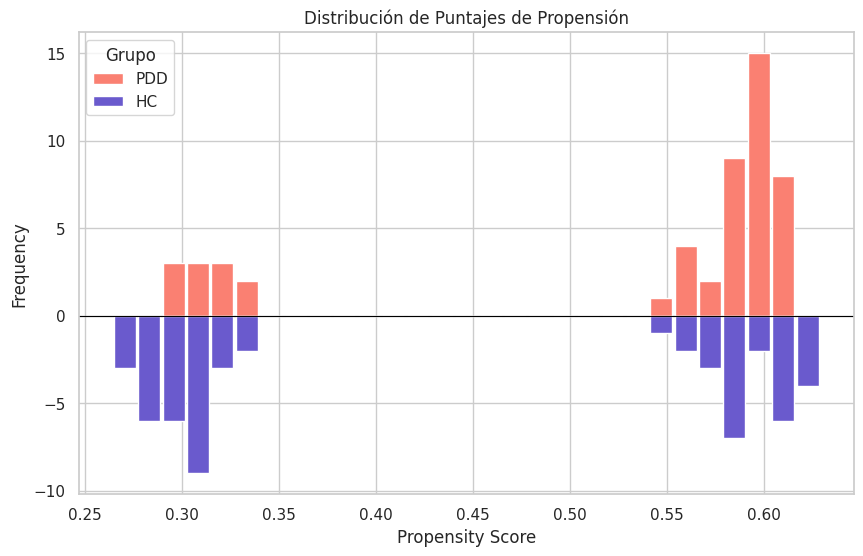

In [ ]:
# Separate propensity scores for each group
pdd_prop_scores = prop_scores_age_sex[treat == 1]  # Extract propensity scores for the treated group (PDD) where 'treat' is 1
hc_prop_scores = prop_scores_age_sex[treat == 0]  # Extract propensity scores for the control group (HC) where 'treat' is 0

# Plot the propensity scores
plot_propensity_scores(pdd_prop_scores, hc_prop_scores)  # Call the function to plot the distribution of propensity scores for both groups

In [ ]:
# Organize the 'Age' column from each dataframe in descending order
matched_data_age_sex_sorted = matched_data_age_sex.sort_values(by=age_column, ascending=False).copy()
# Sort the 'matched_data_age_sex' DataFrame by the 'Age' column in descending order and create a copy of the sorted DataFrame

In [ ]:
# Organize the 'Age' column of the 'matched_data_age' DataFrame in descending order
matched_data_age_sorted = matched_data_age.sort_values(by=age_column, ascending=False).copy()
# Sort the 'matched_data_age' DataFrame by the 'Age' column in descending order and create a copy of the sorted DataFrame

In [ ]:
# Display the count of each value in the 'Group' column of the 'matched_data_age_sex_sorted' DataFrame
matched_data_age_sex_sorted['Group'].value_counts()
# This command counts and displays the number of occurrences of each unique value in the 'Group' column.

,count
Group,
HC,21
PDD,20


In [ ]:
# Display the count of each value in the 'Group' column of the 'matched_data_age_sorted' DataFrame
matched_data_age_sorted['Group'].value_counts()
# This command counts and displays the number of occurrences of each unique value in the 'Group' column.

,count
Group,
PDD,36
HC,26


In [ ]:
# Create a DataFrame with HC and PDD subjects, selecting the first 20 from each group
hc_subjects = matched_data_age_sex[matched_data_age_sex['Group'] == 'HC'].head(20)  # Selects the first 20 subjects from HC group
pdd_subjects = matched_data_age_sex[matched_data_age_sex['Group'] == 'PDD'].head(20)  # Selects the first 20 subjects from PDD group

# Merge the DataFrames to check for matches based on 'Age' and 'Sex'
merged = pd.merge(hc_subjects, pdd_subjects, on=['Age', 'Sex'], how='outer', suffixes=('_HC', '_PDD'))
# This merges the HC and PDD DataFrames on 'Age' and 'Sex' columns and keeps all rows from both DataFrames, adding suffixes for column names

# Check if all HC subjects have at least one match in PDD
hc_ages_sex = set(zip(hc_subjects['Age'], hc_subjects['Sex']))  # Creates a set of (Age, Sex) tuples for HC subjects
pdd_ages_sex = set(zip(pdd_subjects['Age'], pdd_subjects['Sex']))  # Creates a set of (Age, Sex) tuples for PDD subjects

# Verify if all HC (Age, Sex) combinations are present in PDD (Age, Sex) combinations
all_hc_matched = all(item in pdd_ages_sex for item in hc_ages_sex)
# Checks if every (Age, Sex) combination from HC is found in PDD

# Combine both groups into a single DataFrame
balanced_matched_age_sex_subjects = pd.concat([hc_subjects, pdd_subjects])
# Concatenates the HC and PDD DataFrames into a single DataFrame

# Display the count of each group in the balanced DataFrame
print("Balanced Matching by Age and Sex:")
print(balanced_matched_age_sex_subjects['Group'].value_counts())
# Shows the number of occurrences of each group in the combined DataFrame

# Result message based on the matching check
if all_hc_matched:
    print("Each HC subject has at least one PDD subject with the same age and sex.")
else:
    print("Not all HC subjects have a match in PDD with the same age and sex.")
# Prints a message indicating whether every HC subject has a matching PDD subject based on age and sex

Balanced Matching by Age and Sex:
Group
HC     20
PDD    20
Name: count, dtype: int64
Cada sujeto en HC tiene al menos un sujeto en PDD con la misma edad y sexo.
